### Import libraries and data

In [1]:
# import libraries, packages and modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize':(10,5)})
plt.rcParams['figure.dpi'] = 300

In [2]:
def fraud(df):
    return df[df.FraudResult == 1]

def no_fraud(df):
    return df[df.FraudResult == 0]

In [3]:
# import data

df = pd.read_csv("data/training.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Transform TransactionTime into Dates and Times

In [4]:
import datetime

# Transform type object to type datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionStartTime'].head()

# Split date and time
df['Date'] = df['TransactionStartTime'].dt.date
df['Time'] = df['TransactionStartTime'].dt.time

# Split Date into year, month, week and day
df['Year'] = df['TransactionStartTime'].dt.year
df['Month'] = df['TransactionStartTime'].dt.month
df['Week'] = df['TransactionStartTime'].dt.isocalendar().week
df['Day'] = df['TransactionStartTime'].dt.day



# 0 = Monday - 6 = Sunday
df['Day_of_week'] = df['TransactionStartTime'].dt.dayofweek
df['is_workday'] = df['Day_of_week'].apply(lambda x : True if x != 5 and x != 6 else False).astype(int)

df["Time"] = df["Time"].astype(str)
df['is_worktime'] = df['Time'].apply(lambda x : True if x >= '07:00:00' and x <= '18:00:00' else False).astype(int)
df.drop("Time", axis=1, inplace=True)

# drop redundant columns
df.drop("Date", axis=1, inplace=True)
df.drop("TransactionStartTime", axis=1, inplace=True)


### Clean up IDs and remove unneccessary columns

In [5]:
df.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,PricingStrategy,FraudResult,Year,Month,Week,Day,Day_of_week,is_workday,is_worktime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2,0,2018,11,46,15,3,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2,0,2018,11,46,15,3,1,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2,0,2018,11,46,15,3,1,0


In [6]:
df.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,Year,Month,Week,Day,Day_of_week,is_workday,is_worktime
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,2018.497115,6.566233,26.501066,15.902898,3.011907,0.793136,0.685382
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,0.499994,5.224310,22.871633,8.962822,1.863651,0.405059,0.464366
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,2018.000000,1.000000,4.000000,8.000000,1.000000,1.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,2018.000000,11.000000,7.000000,16.000000,3.000000,1.000000,1.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,2019.000000,12.000000,50.000000,24.000000,4.000000,1.000000,1.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,2019.000000,12.000000,52.000000,31.000000,6.000000,1.000000,1.000000


In [7]:
# clean entries
df["TransactionId"]=df.TransactionId.str.split('_').str[-1]
df["BatchId"]=df.BatchId.str.split('_').str[-1]
df["AccountId"]=df.AccountId.str.split('_').str[-1]
df["SubscriptionId"]=df.SubscriptionId.str.split('_').str[-1]
df["CustomerId"]=df.CustomerId.str.split('_').str[-1]
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,PricingStrategy,FraudResult,Year,Month,Week,Day,Day_of_week,is_workday,is_worktime
0,76871,36123,3957,887,4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2,0,2018,11,46,15,3,1,0
1,73770,15642,4841,3829,4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2,0,2018,11,46,15,3,1,0
2,26203,53941,4229,222,4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2,0,2018,11,46,15,3,1,0
3,380,102363,648,2185,988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2,0,2018,11,46,15,3,1,0
4,28195,38780,4841,3829,988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2,0,2018,11,46,15,3,1,0


In [8]:
# drop: CountryCode (single value), CurrencyCode (single value) and Value (unclear difference between Value and Amount)
df.drop("CountryCode", axis=1, inplace=True)
df.drop("CurrencyCode", axis=1, inplace=True)
df.drop("Value", axis=1, inplace=True)

## Feature Engineering
### Binary Column for Incoming or Outgoing Transaction

In [9]:
# create new column SignAmount with the sign of Amount (0 for - and 1 for +)
df["SignAmount"] = df["Amount"].apply(lambda x: 1 if x >= 0 else 0)

# create new column AbsAmount with the absolute of Amount
df.eval("ModAmount = abs(Amount)", inplace=True)

# delete Amount column
df.drop("Amount", axis=1, inplace=True)

In [10]:
df.head(3)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,PricingStrategy,FraudResult,Year,Month,Week,Day,Day_of_week,is_workday,is_worktime,SignAmount,ModAmount
0,76871,36123,3957,887,4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,2,0,2018,11,46,15,3,1,0,1,1000.0
1,73770,15642,4841,3829,4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2,0,2018,11,46,15,3,1,0,0,20.0
2,26203,53941,4229,222,4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,2,0,2018,11,46,15,3,1,0,1,500.0


### Dummie variables for categorical columns

In [11]:
# create dummy variable for ProviderId, ProductId, ProductCategory, ChannelId and PricingStrategy
# join the 5 new dataframes with df

df = df.join(pd.get_dummies(df["ProviderId"]))
df = df.join(pd.get_dummies(df["ProductId"]))
df = df.join(pd.get_dummies(df["ProductCategory"]))
df = df.join(pd.get_dummies(df["ChannelId"]))

# add string "PricingStrategy_" to all entries in column "PricingStrategy"
df["PricingStrategy"] ='PricingStrategy_' + df["PricingStrategy"].astype(str)
df = df.join(pd.get_dummies(df["PricingStrategy"]))
 

df.drop(["ProviderId","ProductId","ProductCategory","ChannelId","PricingStrategy"],axis=1,inplace=True)

### BatchSize

In [12]:
#create new feature with the amount of transaction processed in the same batch

df["batch_size"]= df.groupby(["BatchId"]).transform("count")["TransactionId"]
df.drop("BatchId", axis=1, inplace=True)

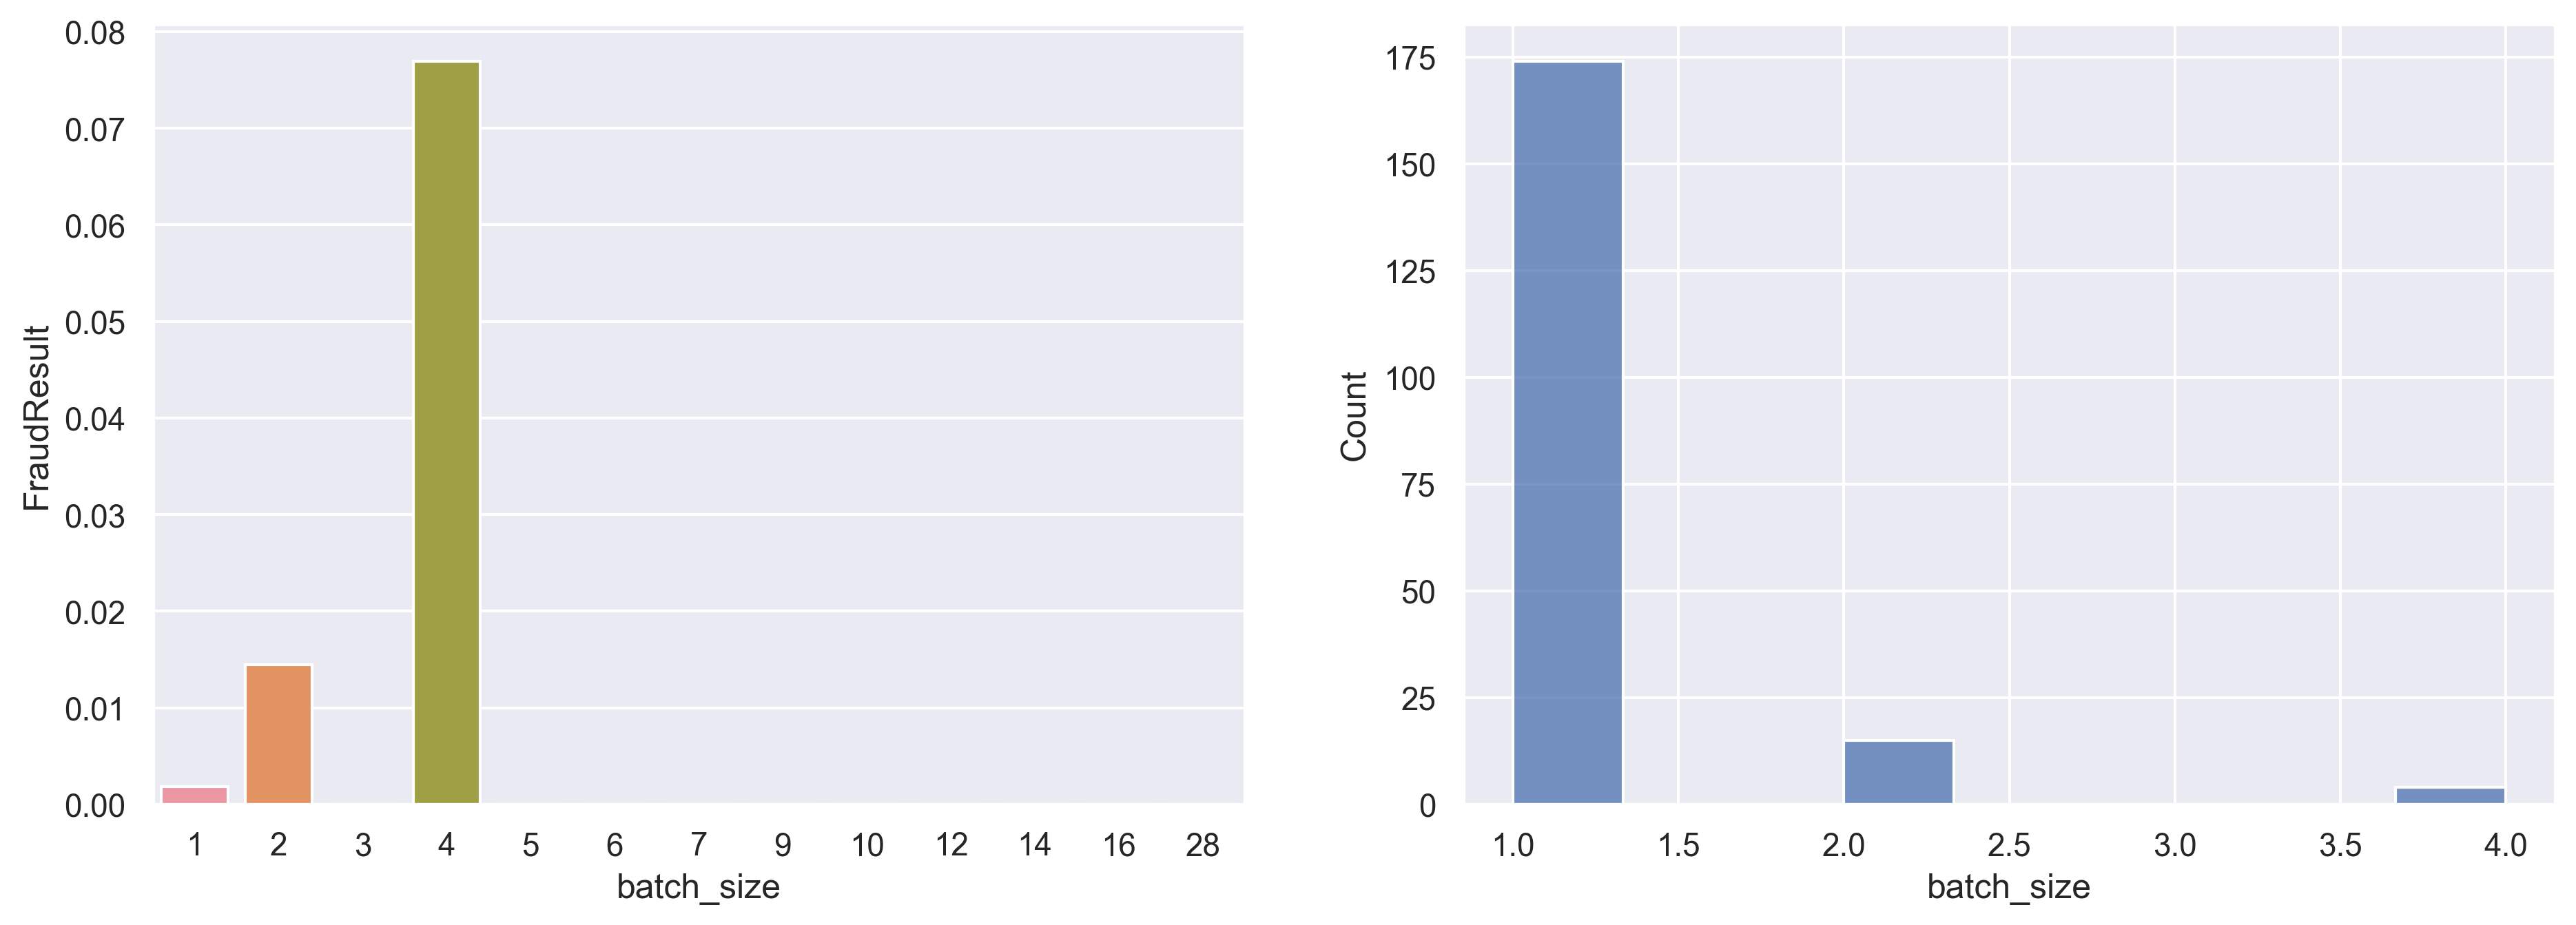

In [13]:
#check distribution of batch size
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.barplot(ax= axs[0], data=df.groupby(["batch_size"]).mean().reset_index(), x= "batch_size", y= "FraudResult")
sns.histplot(ax= axs[1], data=fraud(df), x= "batch_size");

Highest fraud percentage in Batch SIze 4  
But Most fraud in single batch  
=> Batch size probably unnecessary

### Total transactions per customer

In [14]:
#create new feature to see how many transactions are on record for the customerID of this transaction
df["total_transactions_by_customer"] = df.groupby(["CustomerId"]).transform("count")["TransactionId"]
df.sort_values("total_transactions_by_customer", ascending=False).head()

,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Year,Month,Week,Day,Day_of_week,...,ChannelId_1,ChannelId_2,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer
15025,113825,4249,4429,7343,0,2018,12,49,4,1,...,0,1,0,0,0,0,0,1,1,4091
52603,47400,4249,4429,7343,0,2019,1,2,8,1,...,0,1,0,0,0,0,0,1,1,4091
54027,76520,4249,4429,7343,0,2019,1,2,8,1,...,0,1,0,0,0,0,0,1,1,4091
54026,111360,4249,4429,7343,0,2019,1,2,8,1,...,0,1,0,0,0,0,0,1,1,4091
54025,118795,4249,4429,7343,0,2019,1,2,8,1,...,0,1,0,0,0,0,0,1,1,4091


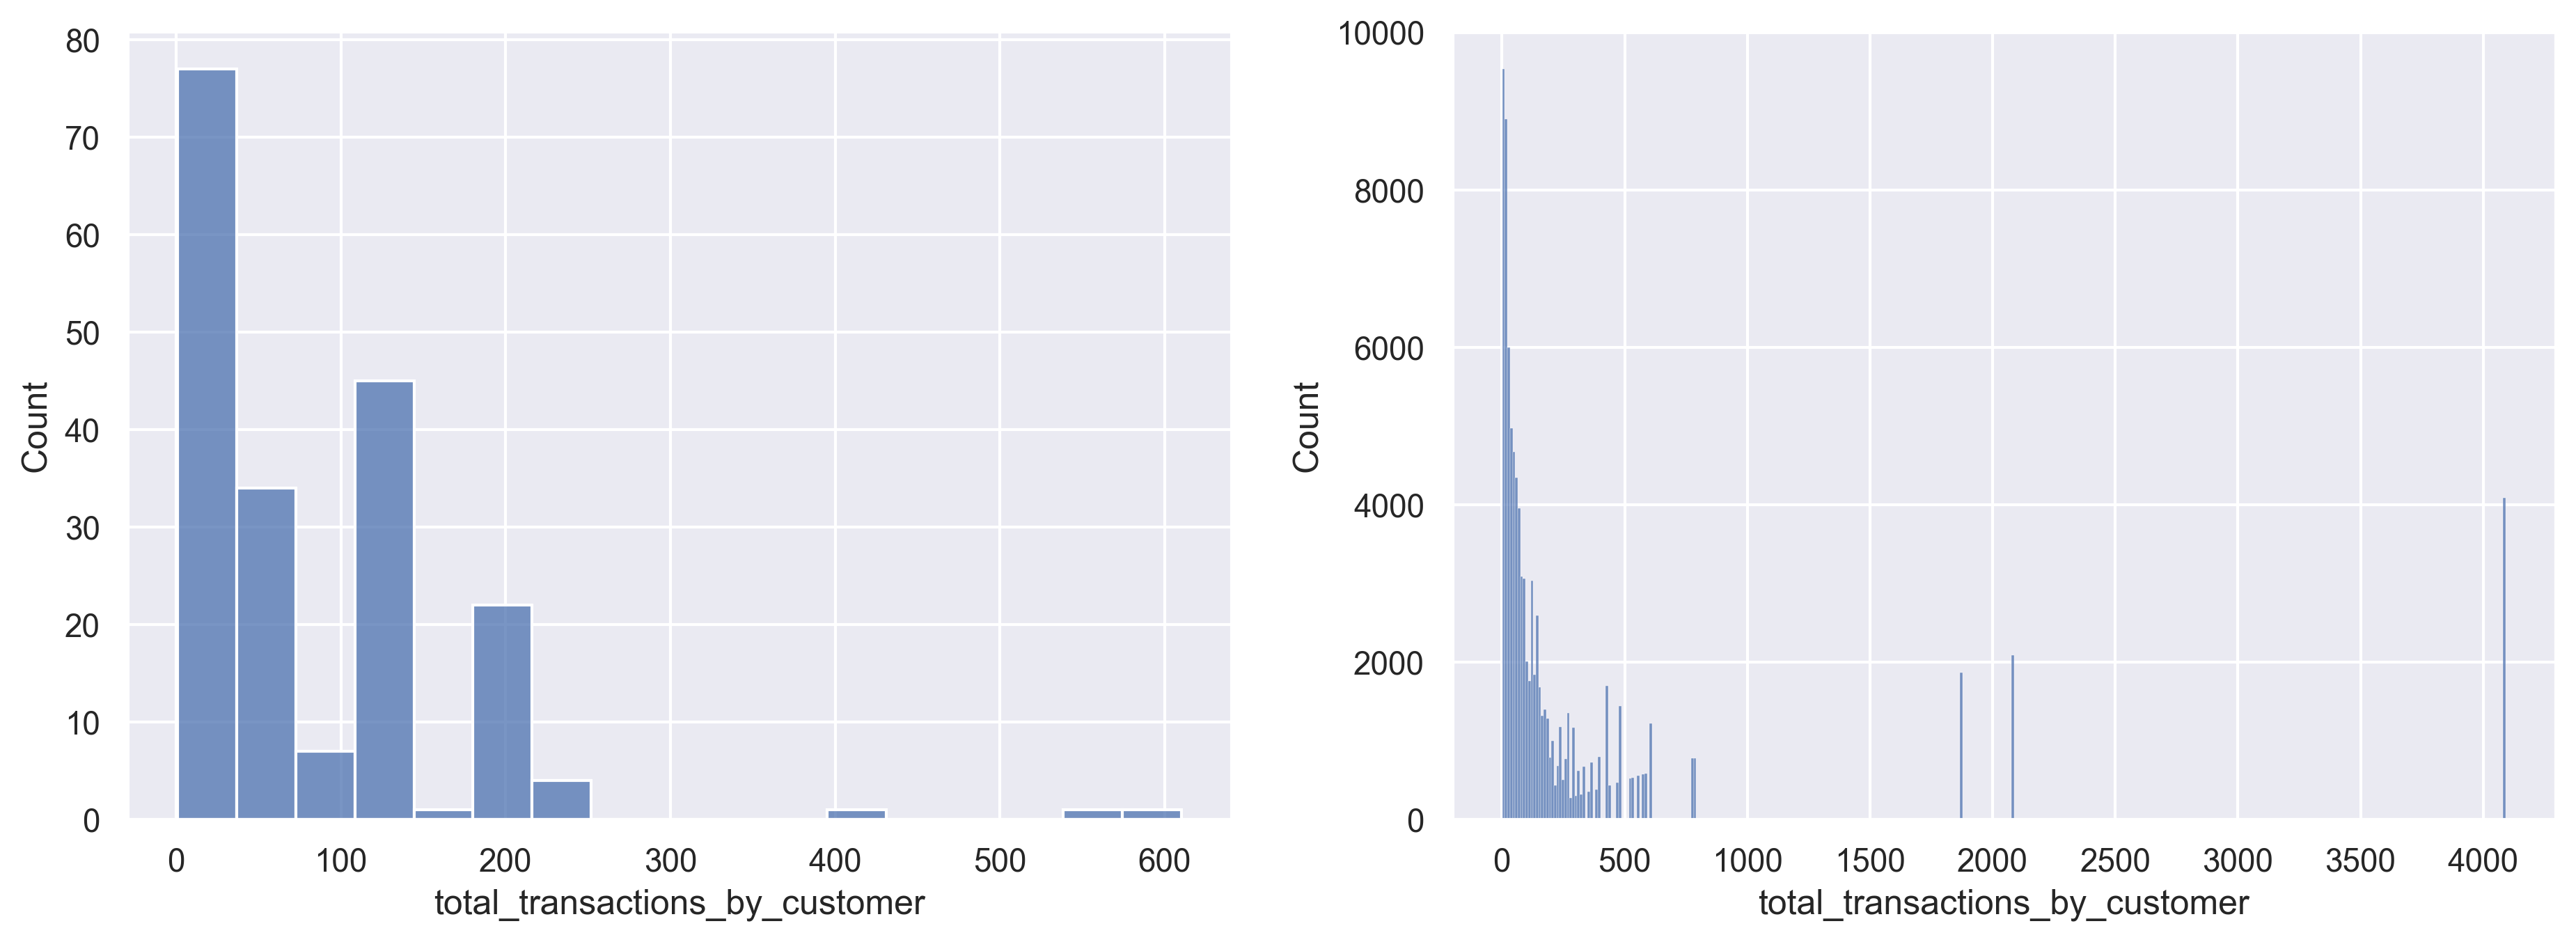

In [15]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data=fraud(df), x= "total_transactions_by_customer")
sns.histplot(ax= axs[1], data=no_fraud(df), x= "total_transactions_by_customer");

Most frauds hit customers with lower numbers of transactions
=> But overall more users with low numbers...

### Total transactions in this month by this customer


In [16]:
#create new feature to see how many transactions were made this month by the customerID of this transaction
df["transactions_by_customer_this_month"] = df.groupby(["CustomerId", "Year", "Month"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_month", ascending=False).head()


,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Year,Month,Week,Day,Day_of_week,...,ChannelId_2,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month
27707,20382,3206,1372,3634,0,2018,12,50,14,4,...,0,1,0,0,0,1,0,1,2085,2081
31825,2809,3206,1372,3634,0,2018,12,51,18,1,...,0,1,0,0,0,1,0,1,2085,2081
38022,98546,4841,3829,3634,0,2018,12,51,23,6,...,1,0,0,0,0,1,0,1,2085,2081
29838,101324,4841,3829,3634,0,2018,12,50,16,6,...,1,0,0,0,0,1,0,1,2085,2081
38018,8013,3206,1372,3634,0,2018,12,51,23,6,...,0,1,0,0,0,1,0,1,2085,2081


### Total transactions in this week by this customer


In [17]:
#create new feature to see how many transactions were made this week by the customerID of this transaction
df["transactions_by_customer_this_week"] = df.groupby(["CustomerId", "Year", "Week"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_week", ascending=False).head()


,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Year,Month,Week,Day,Day_of_week,...,ChannelId_3,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week
16903,121657,4249,4429,7343,0,2018,12,49,4,1,...,0,0,0,0,0,1,1,4091,2047,2005
15497,52764,4249,4429,7343,0,2018,12,49,4,1,...,0,0,0,0,0,1,1,4091,2047,2005
15482,64948,4249,4429,7343,0,2018,12,49,4,1,...,0,0,0,0,0,1,1,4091,2047,2005
15484,83331,4249,4429,7343,0,2018,12,49,4,1,...,0,0,0,0,0,1,1,4091,2047,2005
15485,127489,4249,4429,7343,0,2018,12,49,4,1,...,0,0,0,0,0,1,1,4091,2047,2005


### Total transactions on this day by this customer

In [18]:
#create new feature to see how many transactions were made this week by the customerID of this transaction
df["transactions_by_customer_this_day"] = df.groupby(["CustomerId", "Year", "Month", "Day"]).transform("count")["TransactionId"]
df.sort_values("transactions_by_customer_this_day", ascending=False).head()

,TransactionId,AccountId,SubscriptionId,CustomerId,FraudResult,Year,Month,Week,Day,Day_of_week,...,ChannelId_5,PricingStrategy_0,PricingStrategy_1,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day
53496,116788,4249,4429,7343,0,2019,1,2,8,1,...,0,0,0,0,1,1,4091,2016,2000,1999
54293,130101,4249,4429,7343,0,2019,1,2,8,1,...,0,0,0,0,1,1,4091,2016,2000,1999
54286,95044,4249,4429,7343,0,2019,1,2,8,1,...,0,0,0,0,1,1,4091,2016,2000,1999
54287,107930,4249,4429,7343,0,2019,1,2,8,1,...,0,0,0,0,1,1,4091,2016,2000,1999
54288,21198,4249,4429,7343,0,2019,1,2,8,1,...,0,0,0,0,1,1,4091,2016,2000,1999


<AxesSubplot:xlabel='transactions_by_customer_this_month', ylabel='Count'>

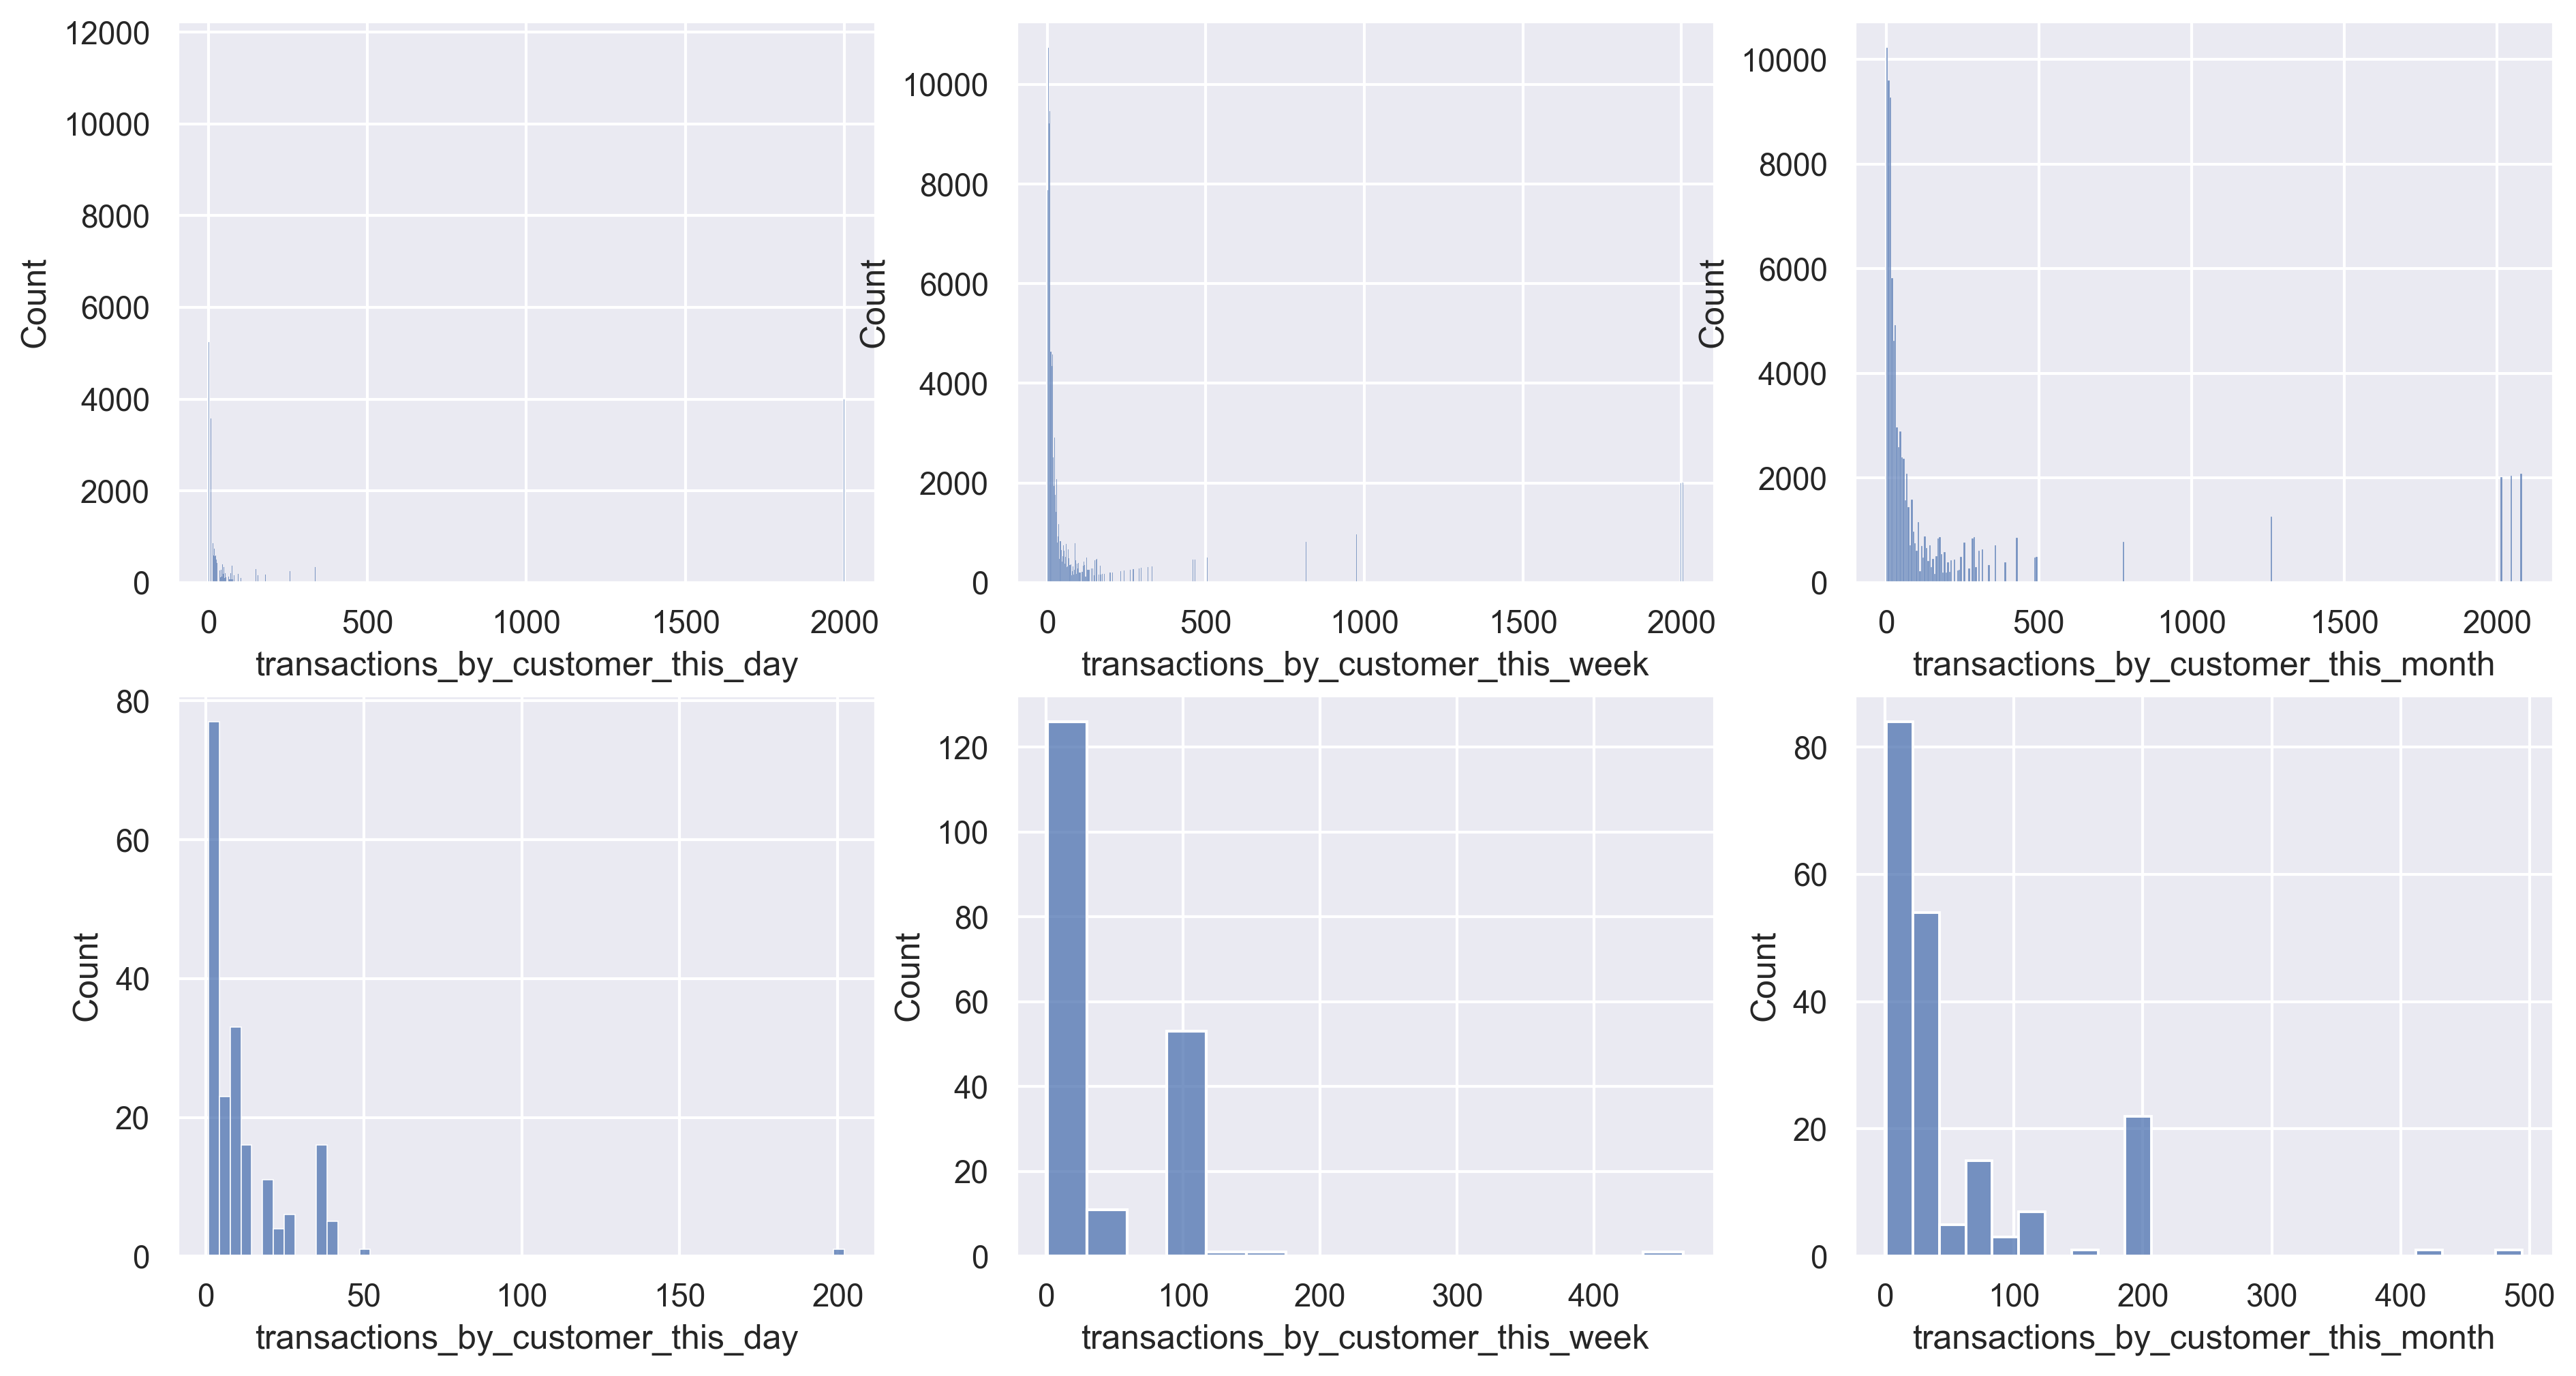

In [19]:
# plot distributions of the transactions per timeframe
fig, axs = plt.subplots(2,3, figsize=(15, 8), sharey=False)
sns.histplot(ax= axs[0,0], data= no_fraud(df), x="transactions_by_customer_this_day")
sns.histplot(ax= axs[0,1], data= no_fraud(df), x="transactions_by_customer_this_week")
sns.histplot(ax= axs[0,2], data= no_fraud(df), x="transactions_by_customer_this_month")
sns.histplot(ax= axs[1,0], data= fraud(df), x="transactions_by_customer_this_day")
sns.histplot(ax= axs[1,1], data= fraud(df), x="transactions_by_customer_this_week")
sns.histplot(ax= axs[1,2], data= fraud(df), x="transactions_by_customer_this_month")

<AxesSubplot:xlabel='FraudResult', ylabel='transactions_by_customer_this_month'>

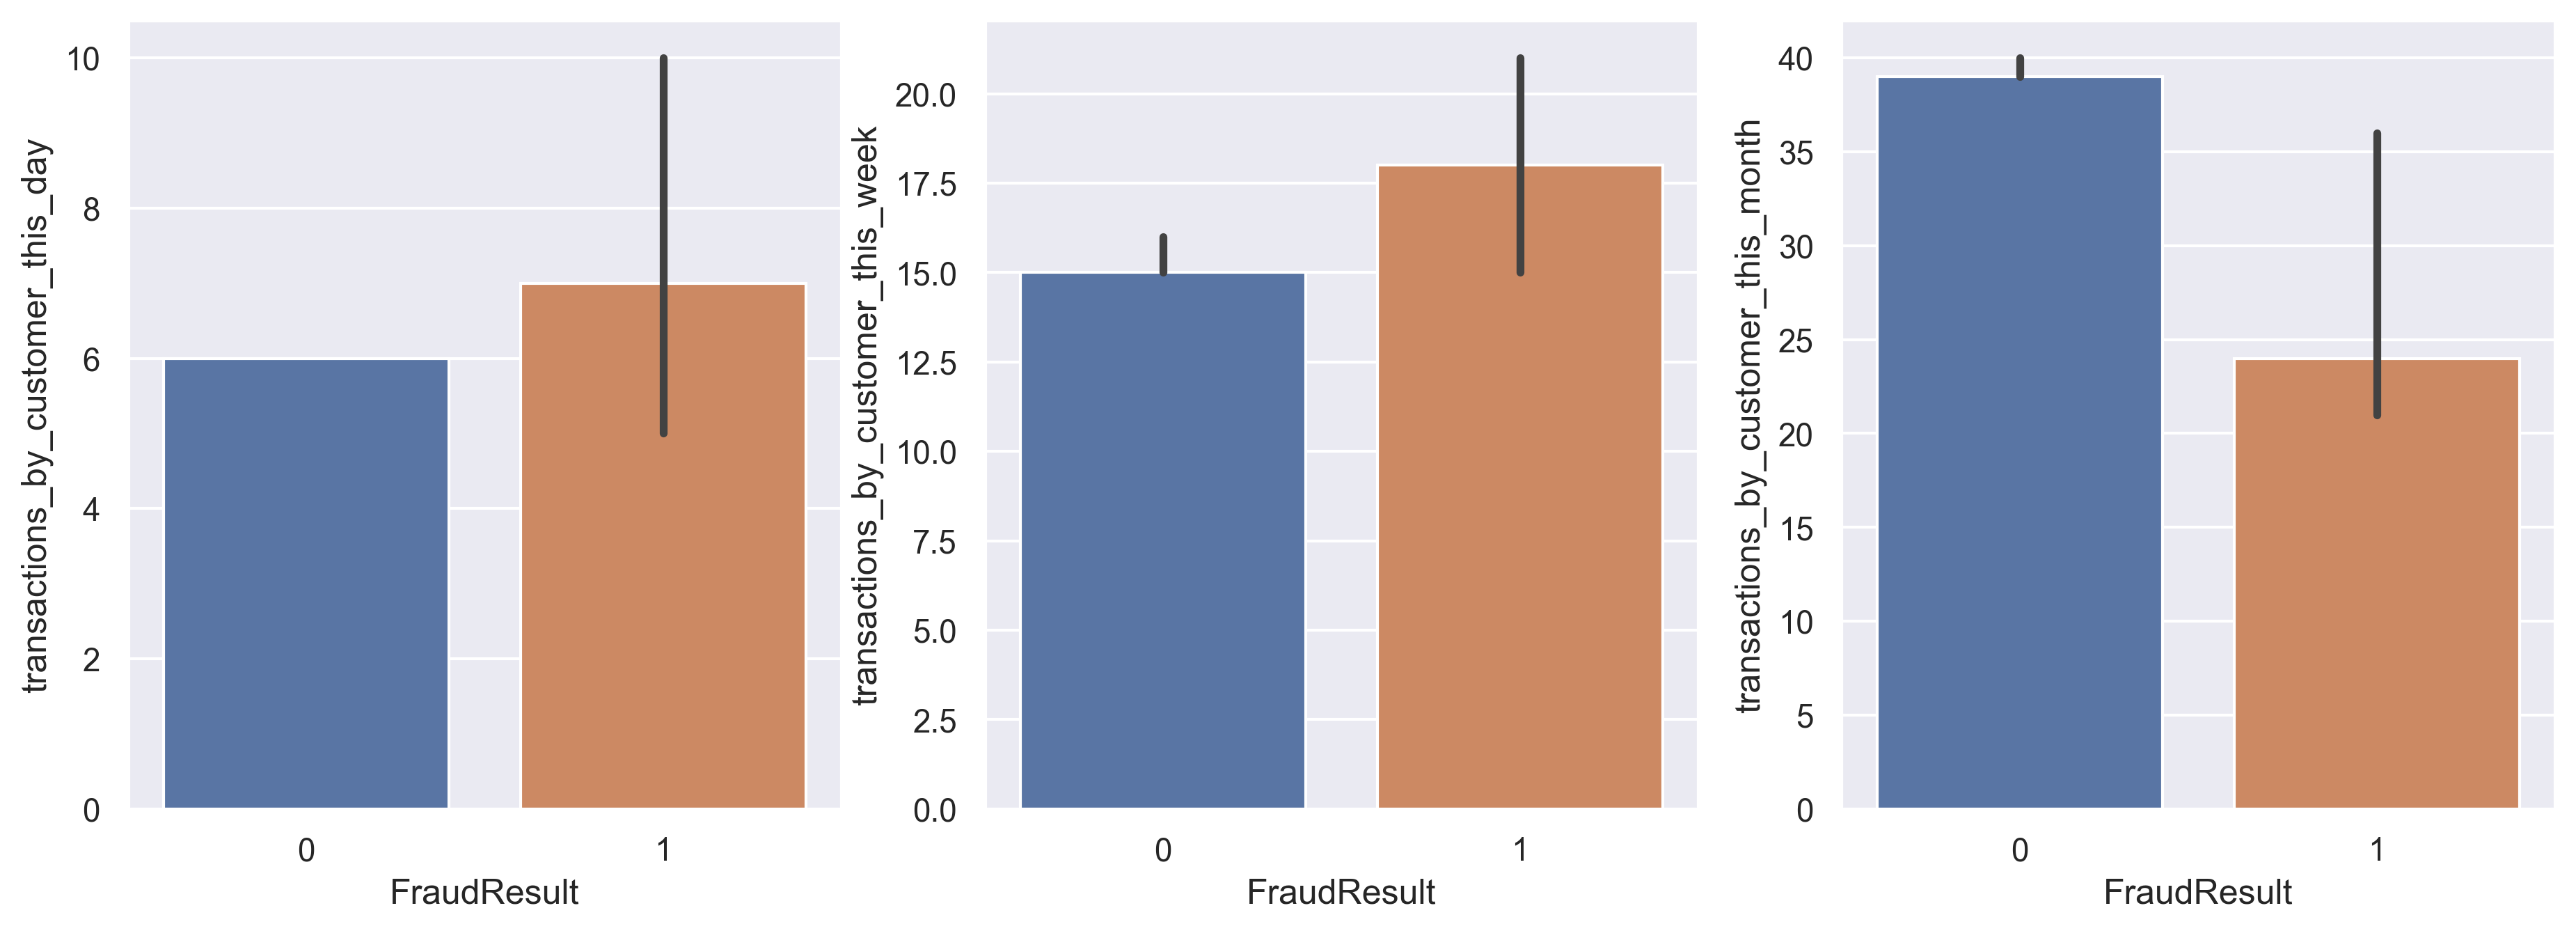

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)
sns.barplot(ax= axs[0], data= df, x= "FraudResult", y="transactions_by_customer_this_day", estimator=np.median)
sns.barplot(ax= axs[1], data= df, x= "FraudResult", y="transactions_by_customer_this_week", estimator=np.median)
sns.barplot(ax= axs[2], data= df, x= "FraudResult", y="transactions_by_customer_this_month", estimator=np.median)

### Unusual amounts of transaction in current timeframe?

In [21]:
df["day_vs_week"] = df["transactions_by_customer_this_day"] / df["transactions_by_customer_this_week"]
df["day_vs_month"] = df["transactions_by_customer_this_day"] / df["transactions_by_customer_this_month"]
df["week_vs_month"] = df["transactions_by_customer_this_week"] / df["transactions_by_customer_this_month"]

<AxesSubplot:xlabel='FraudResult', ylabel='week_vs_month'>

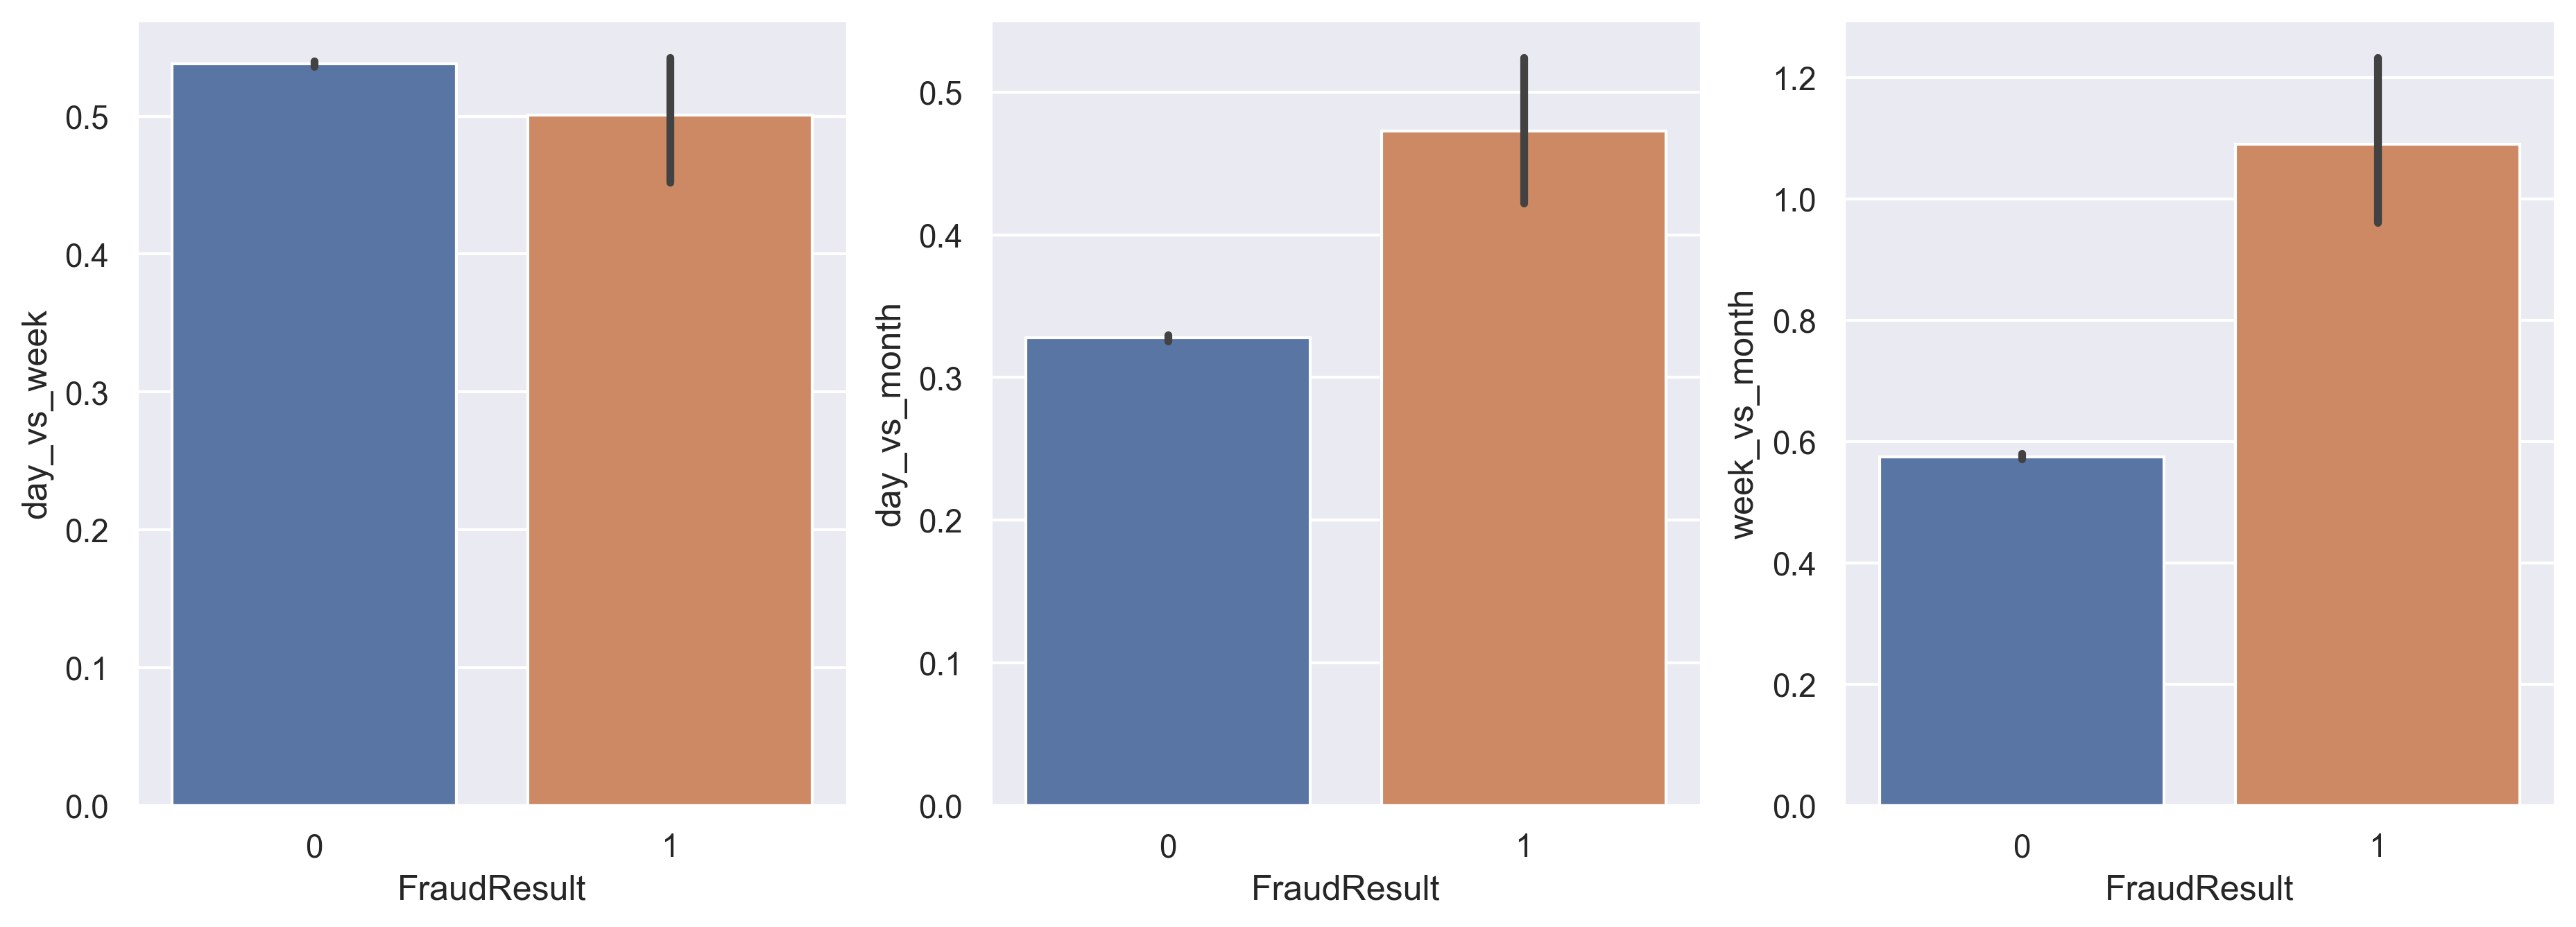

In [22]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), sharey=False)
sns.barplot(ax= axs[0], data= df, x= "FraudResult", y="day_vs_week")
sns.barplot(ax= axs[1], data= df, x= "FraudResult", y="day_vs_month")
sns.barplot(ax= axs[2], data= df, x= "FraudResult", y="week_vs_month")

large percentage of monthly transactions made on single day => more likely to be fraud  
large percentage of monthly transactions made this week => more likely to be fraud

<AxesSubplot:xlabel='day_vs_week', ylabel='Count'>

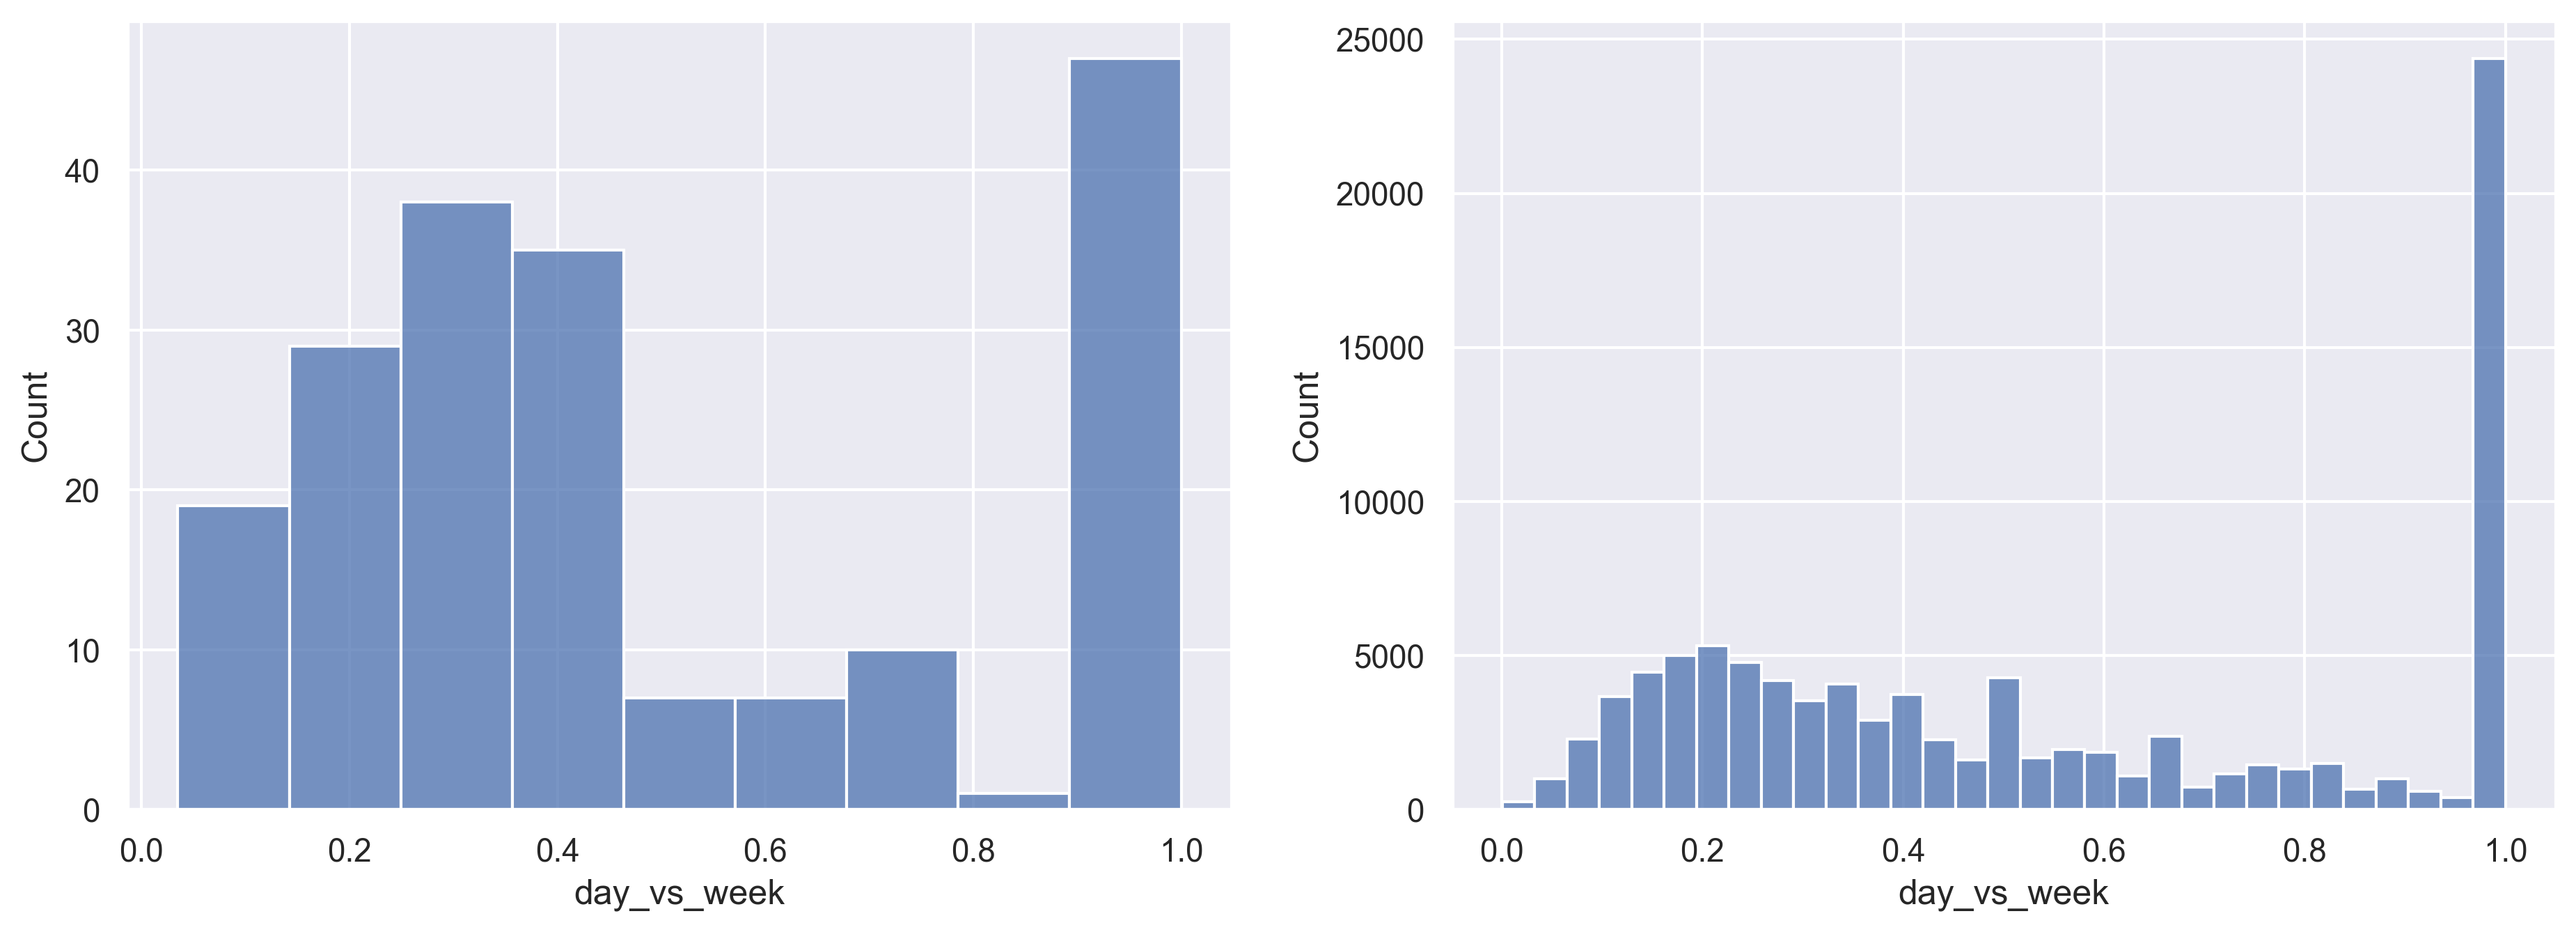

In [23]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data= fraud(df), x="day_vs_week")
sns.histplot(ax= axs[1], data= no_fraud(df), x="day_vs_week")

<AxesSubplot:xlabel='day_vs_month', ylabel='Count'>

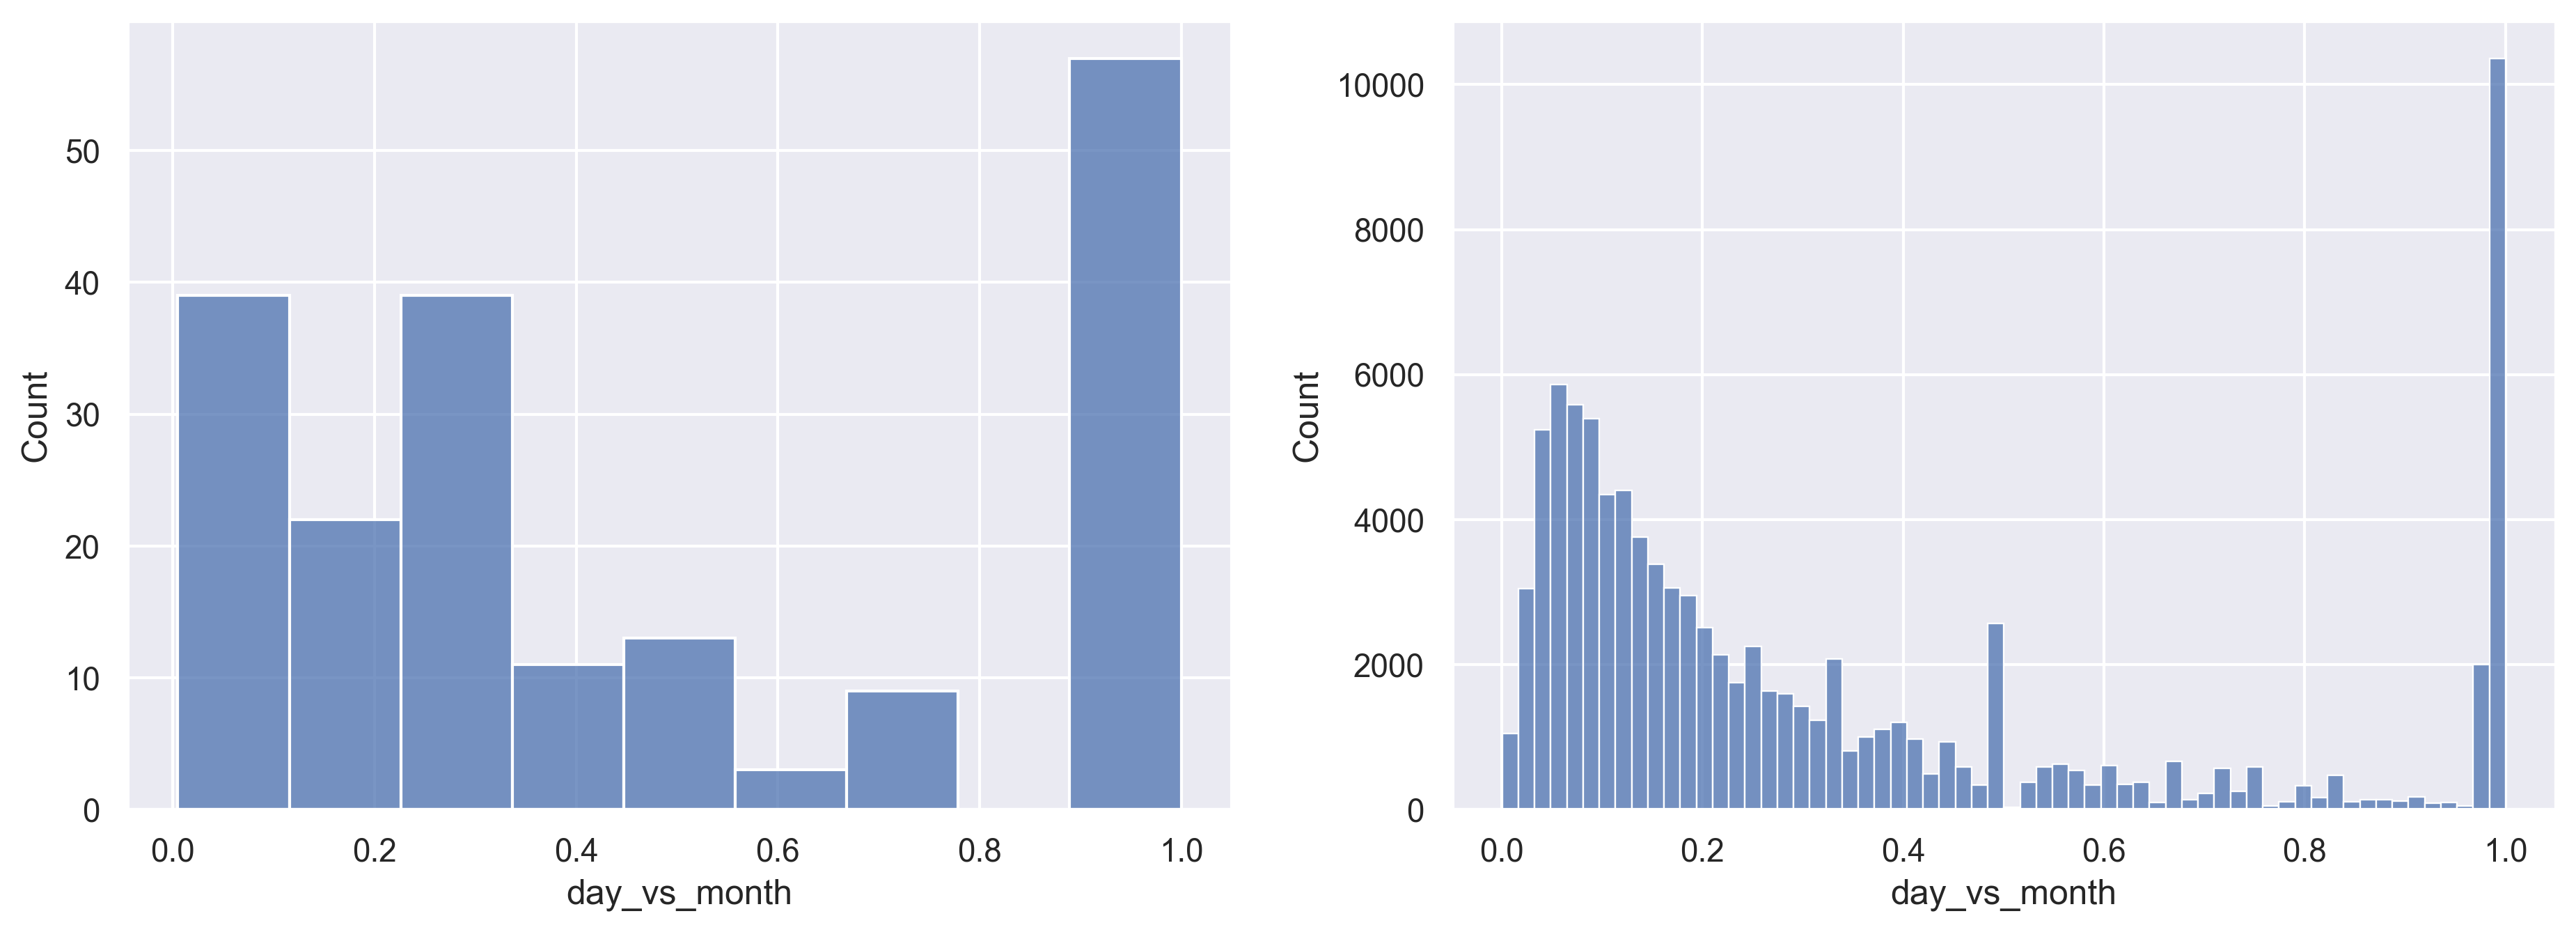

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data= fraud(df), x="day_vs_month")
sns.histplot(ax= axs[1], data= no_fraud(df), x="day_vs_month")

<AxesSubplot:xlabel='week_vs_month', ylabel='Count'>

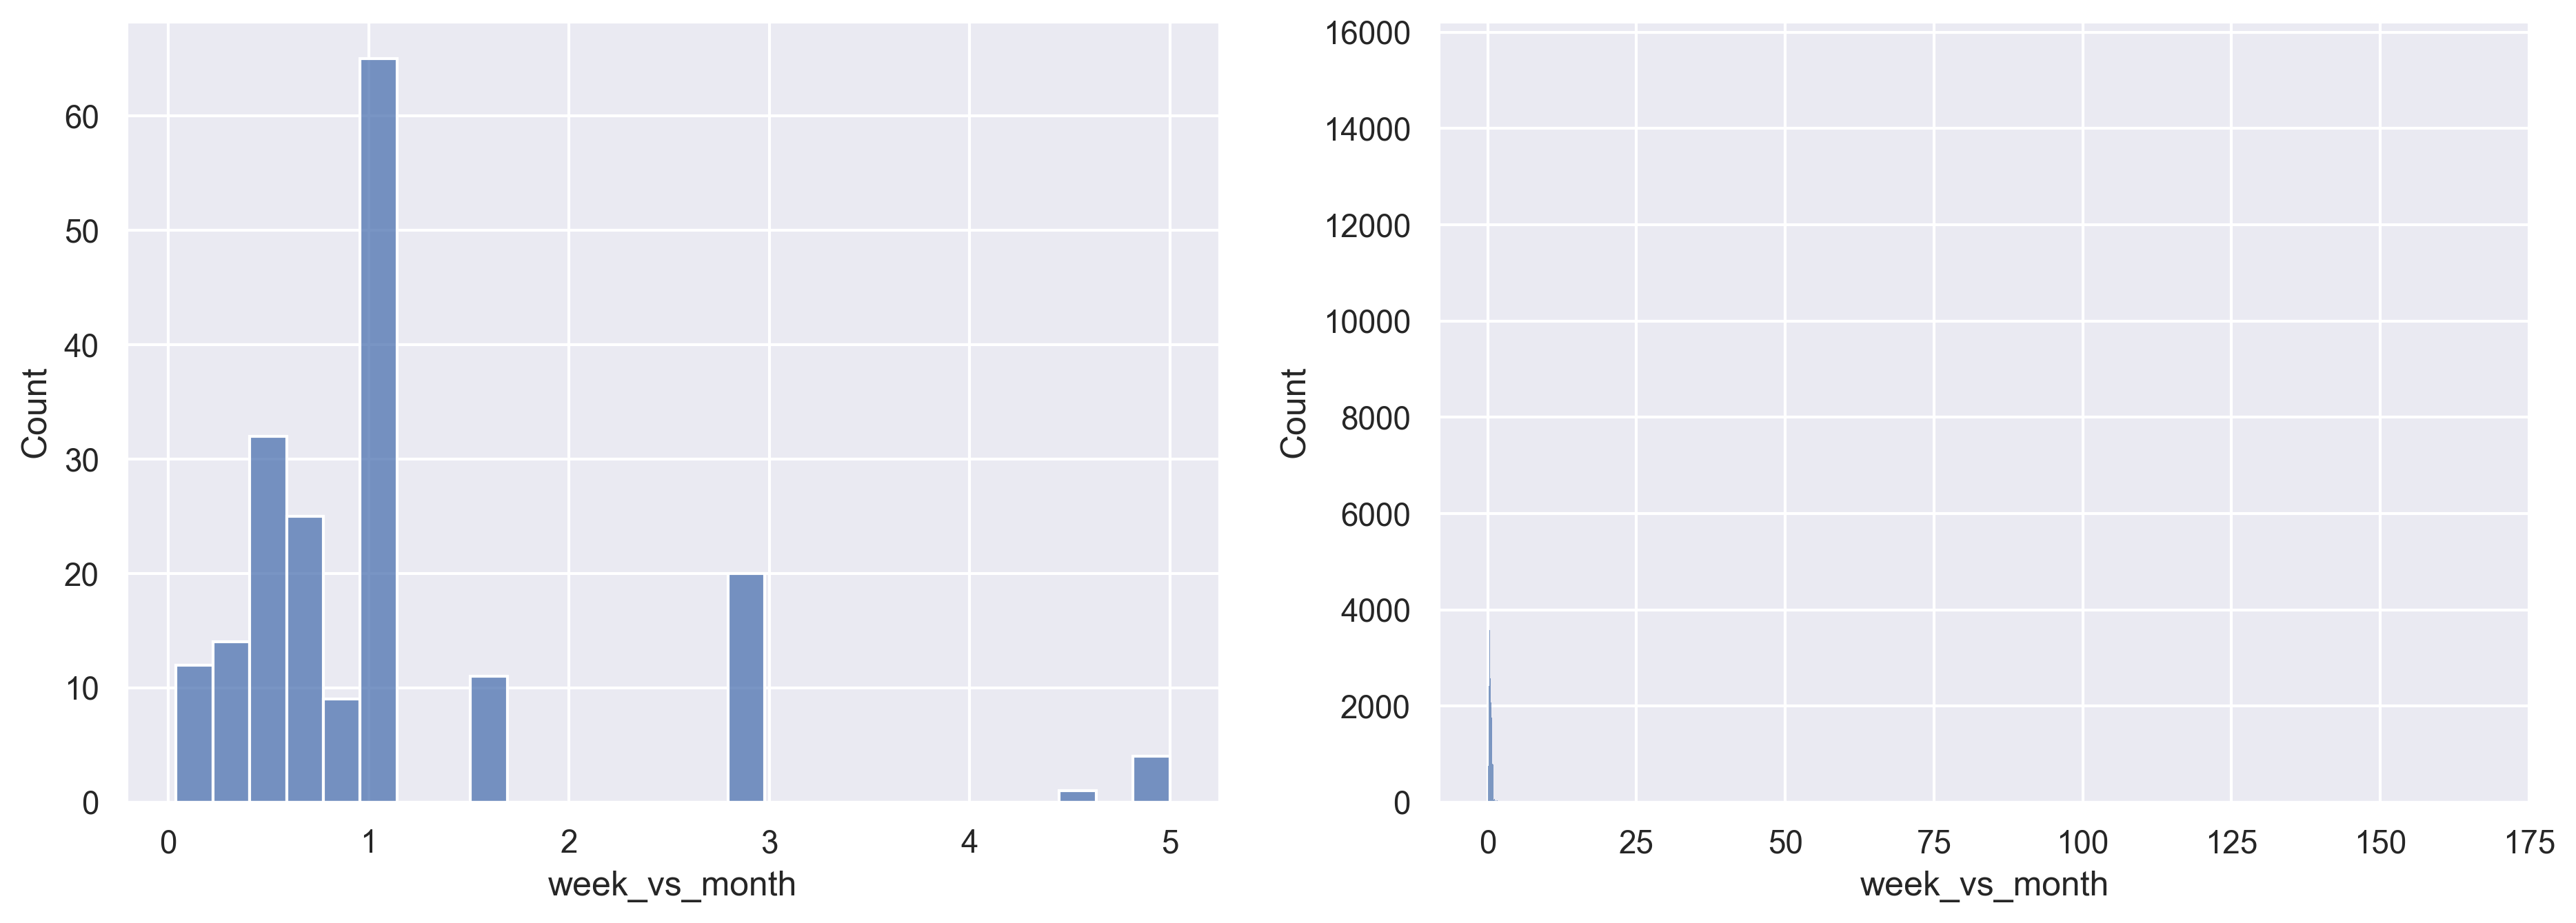

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15, 5), sharey=False)
sns.histplot(ax= axs[0], data= fraud(df), x="week_vs_month")
sns.histplot(ax= axs[1], data= no_fraud(df), x="week_vs_month")

In [26]:
df.drop(["AccountId","SubscriptionId","CustomerId", "Day_of_week"], axis=1, inplace=True)
df

,TransactionId,FraudResult,Year,Month,Week,Day,is_workday,is_worktime,SignAmount,ModAmount,...,PricingStrategy_2,PricingStrategy_4,batch_size,total_transactions_by_customer,transactions_by_customer_this_month,transactions_by_customer_this_week,transactions_by_customer_this_day,day_vs_week,day_vs_month,week_vs_month
0,76871,0,2018,11,46,15,1,0,1,1000.0,...,1,0,1,119,47,12,2,0.166667,0.042553,0.255319
1,73770,0,2018,11,46,15,1,0,0,20.0,...,1,0,1,119,47,12,2,0.166667,0.042553,0.255319
2,26203,0,2018,11,46,15,1,0,1,500.0,...,1,0,1,2,2,1,1,1.000000,0.500000,0.500000
3,380,0,2018,11,46,15,1,0,1,20000.0,...,1,0,1,38,5,4,4,1.000000,0.800000,0.800000
4,28195,0,2018,11,46,15,1,0,0,644.0,...,1,0,1,38,5,4,4,1.000000,0.800000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,89881,0,2019,2,7,13,1,1,0,1000.0,...,1,0,1,573,291,108,22,0.203704,0.075601,0.371134
95658,91597,0,2019,2,7,13,1,1,1,1000.0,...,1,0,1,43,24,13,2,0.153846,0.083333,0.541667
95659,82501,0,2019,2,7,13,1,1,0,20.0,...,1,0,1,43,24,13,2,0.153846,0.083333,0.541667
95660,136354,0,2019,2,7,13,1,1,1,3000.0,...,1,0,1,524,47,36,8,0.222222,0.170213,0.765957


In [27]:
df.set_index("TransactionId")
df.to_csv("data/training_preprocessed.csv", index=False)

# Modelling

In [28]:
# Import modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, make_scorer, matthews_corrcoef, f1_score, classification_report, fbeta_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from Error_analysis import calculate_cost

RSEED= 42

sns.set(rc={'figure.figsize':(12,8)})

In [29]:
# Import processed Dataset
df= pd.read_csv('data/training_preprocessed.csv')

In [30]:
y= df.FraudResult
df.drop("FraudResult", axis=1, inplace=True)
X= df

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=RSEED)
X_test_unscaled = X_test.copy()
X_train.drop(["TransactionId"], axis=1, inplace=True)
X_test.drop(["TransactionId"], axis=1, inplace=True)

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("----" * 10)
print(f"Recall is:{round(recall_score(y_test, y_pred),3)}")
print(f"F1 is:{round(f1_score(y_test, y_pred),3)}")
print(f"MCC is:{round(matthews_corrcoef(y_test, y_pred),3)}")
calculate_cost(X_test_unscaled, y_test, y_pred)

[[23859     9]
 [   14    34]]
----------------------------------------
Recall is:0.708
F1 is:0.747
MCC is:0.748
You detected 34 fraudulent transactions
You saved the company 84.92 Million UGX
You missed 14 fraudulent transactions
The company now has to reimburse frauds with a total of 12.9 Million UGX
Total money saved is 72.02 Million UGX
You incorrectly flagged 9 legit transactions as fraudulent


## Scaling

In [33]:
stdsc = StandardScaler()
X_train['ModAmount'] = stdsc.fit_transform(pd.DataFrame(X_train['ModAmount']))
X_test['ModAmount'] = stdsc.transform(pd.DataFrame(X_test['ModAmount']));

In [34]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("----" * 10)
print(f"Recall is:{round(recall_score(y_test, y_pred),3)}")
print(f"F1 is:{round(f1_score(y_test, y_pred),3)}")
print(f"MCC is:{round(matthews_corrcoef(y_test, y_pred),3)}")
calculate_cost(X_test_unscaled, y_test, y_pred)

[[23859     9]
 [   17    31]]
----------------------------------------
Recall is:0.646
F1 is:0.705
MCC is:0.707
You detected 31 fraudulent transactions
You saved the company 78.82 Million UGX
You missed 17 fraudulent transactions
The company now has to reimburse frauds with a total of 19.0 Million UGX
Total money saved is 59.82 Million UGX
You incorrectly flagged 9 legit transactions as fraudulent


## Gridsearch

In [35]:
"""param_grid = {'n_estimators': np.linspace(100, 200, 5).astype(int),
                    'max_depth': [None] + list(np.linspace(3, 100, 10).astype(int)),
                    'max_features': ['sqrt']+ list(np.arange(0.5, 1, 0.25)),
                    'max_leaf_nodes': list(np.linspace(80, 200, 5).astype(int)),
                    'min_samples_split':[2, 5, 10, 50]
                    }

scorer = make_scorer(matthews_corrcoef)

rf_grid = GridSearchCV(rf, param_grid=param_grid, n_jobs=-1, scoring=scorer, verbose=5)""";



In [36]:
#rf_grid.best_params_

## Best model

In [37]:
rf_best = RandomForestClassifier(max_features= 0.75, max_leaf_nodes = 80, min_samples_split = 5, n_estimators= 125)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print("----" * 10)
print(f"Recall is:{round(recall_score(y_test, y_pred_best),3)}")
print(f"F1 is:{round(f1_score(y_test, y_pred_best),3)}")
print(f"MCC is:{round(matthews_corrcoef(y_test, y_pred_best),3)}")
calculate_cost(X_test_unscaled, y_test, y_pred_best)

[[23867     1]
 [   10    38]]
----------------------------------------
Recall is:0.792
F1 is:0.874
MCC is:0.878
You detected 38 fraudulent transactions
You saved the company 86.02 Million UGX
You missed 10 fraudulent transactions
The company now has to reimburse frauds with a total of 11.8 Million UGX
Total money saved is 74.22 Million UGX
You incorrectly flagged 1 legit transactions as fraudulent


<AxesSubplot:>

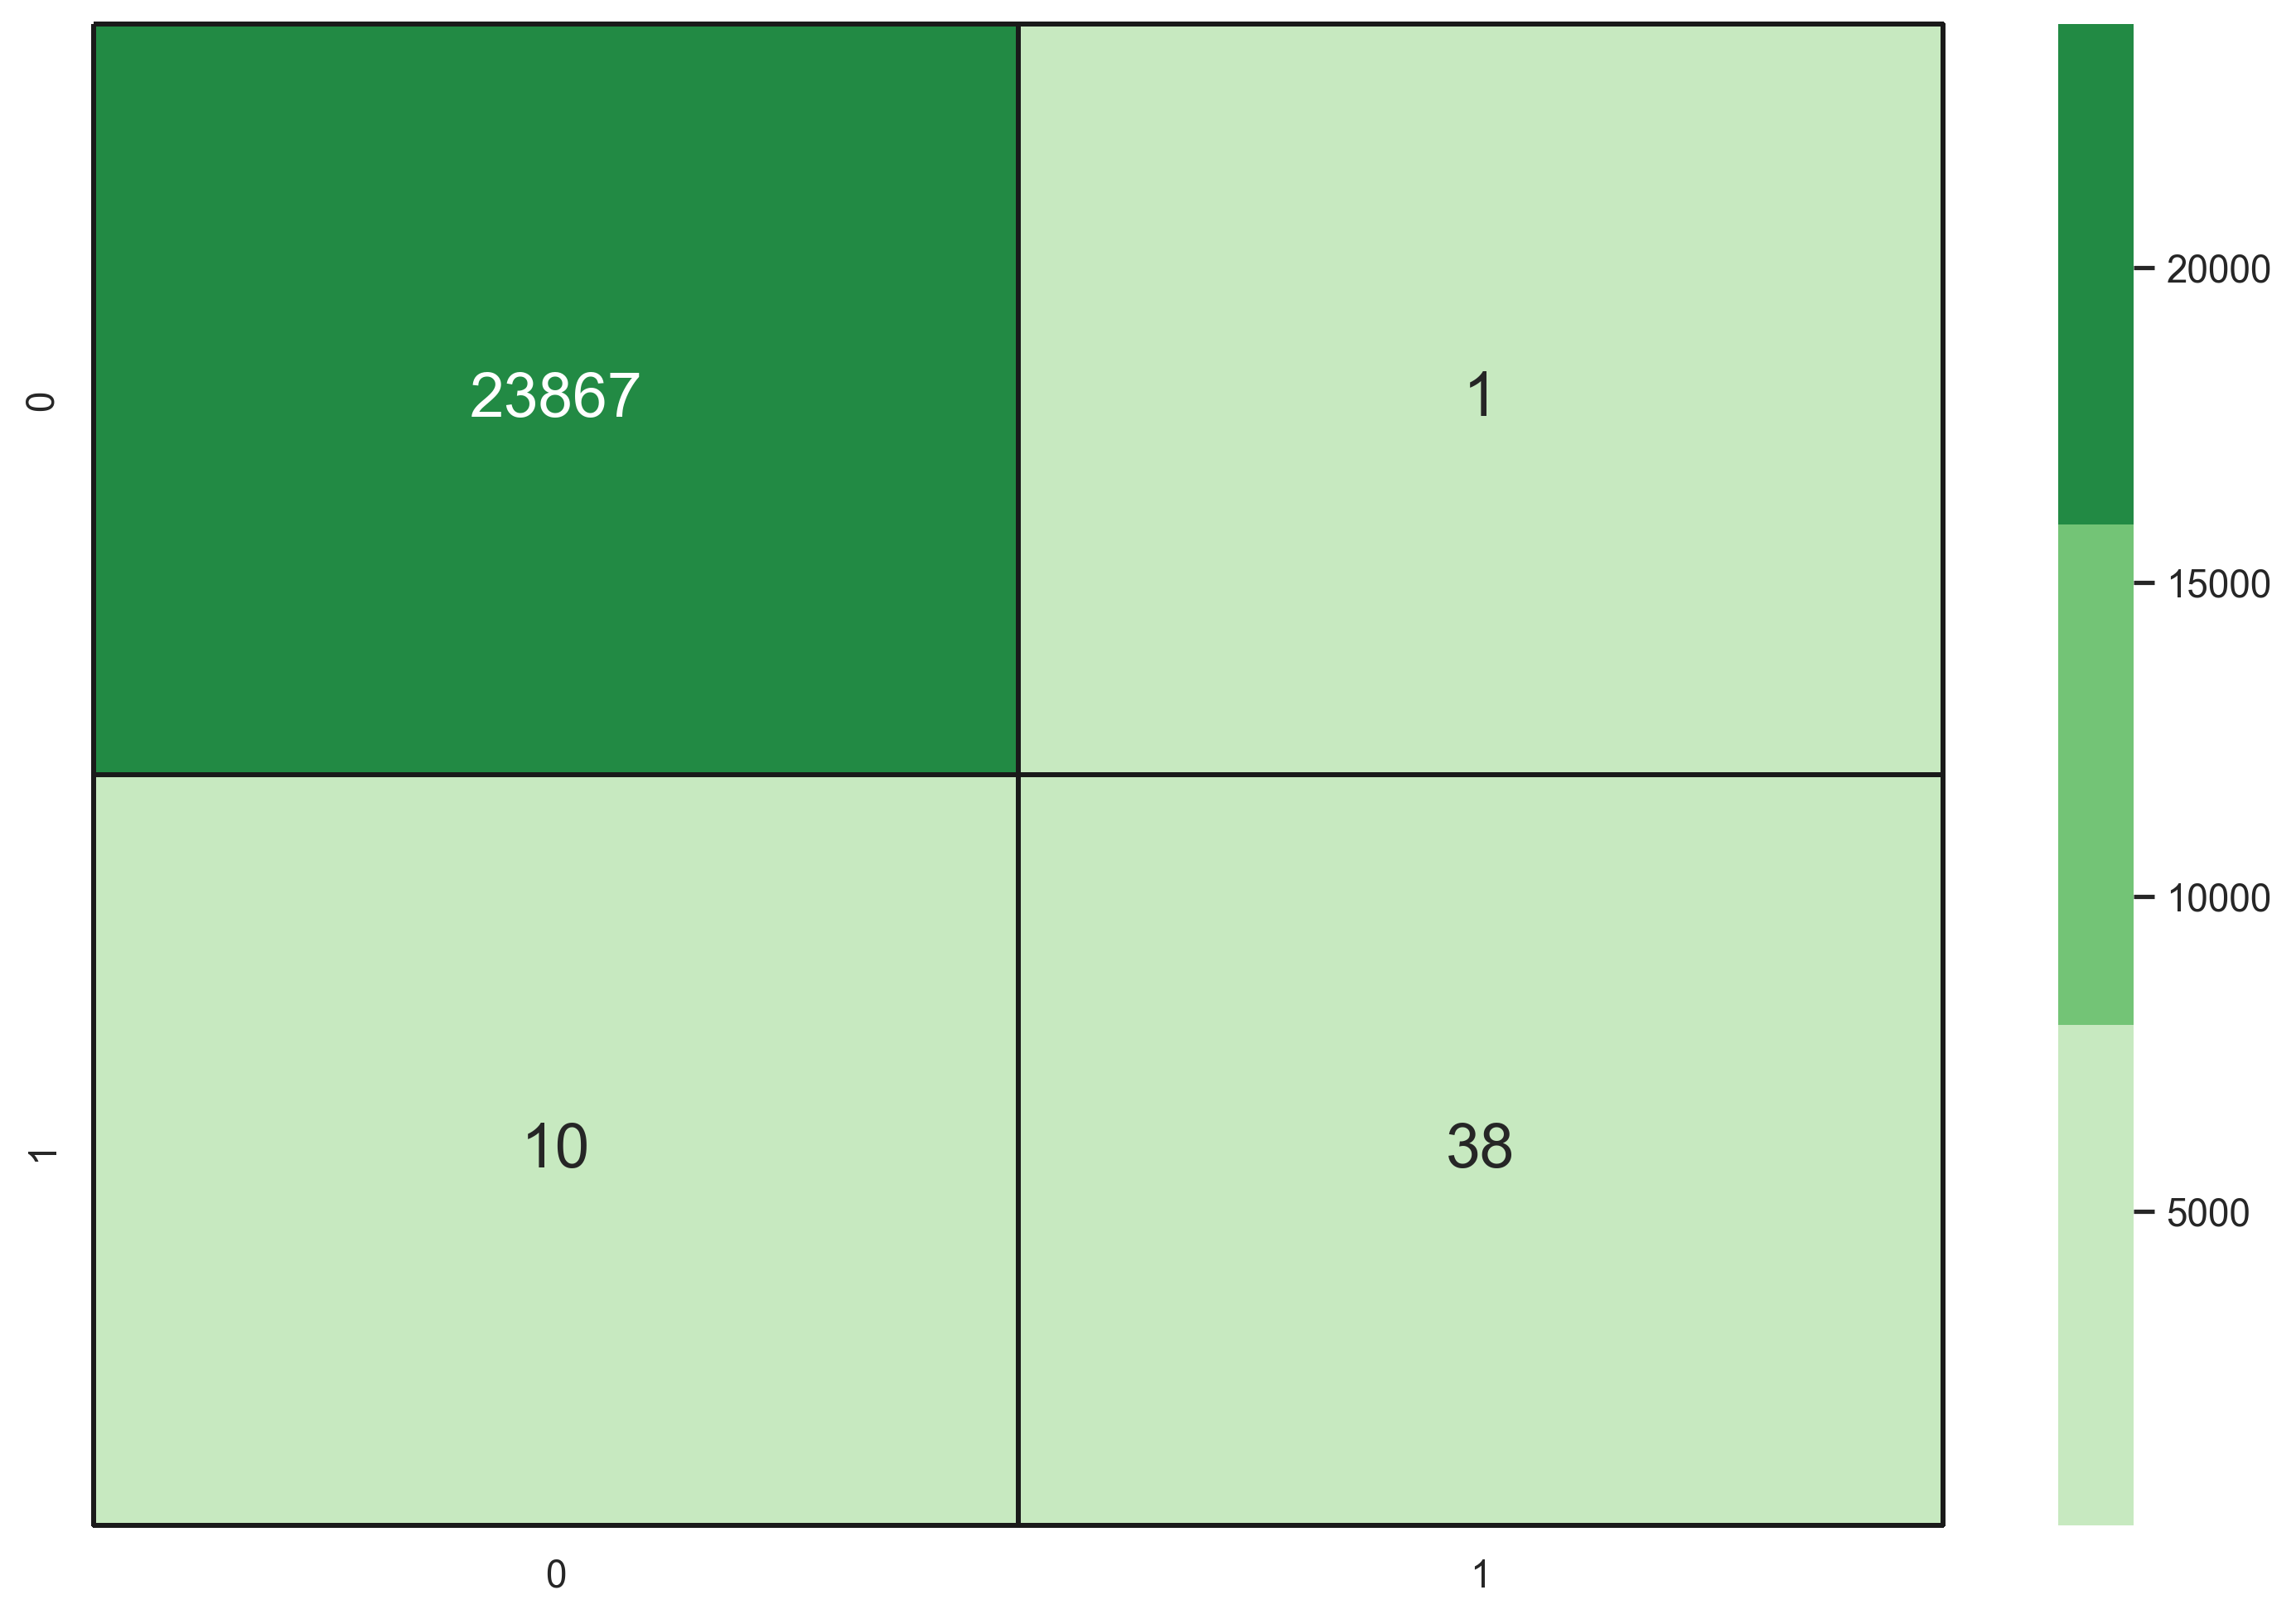

In [38]:
matrix = confusion_matrix(y_test, y_pred_best)
colormap = sns.color_palette("Greens", 3)
sns.heatmap(data=matrix, annot=True, fmt='.0f', annot_kws={"fontsize":18}, linewidths=1, linecolor='k', cmap=colormap, clip_on=False)

## ***Feature importance calculations and plotting***

In [39]:

Names = list(X_test.columns.values)
importances = rf_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_best.estimators_], axis=0)
forest_importances = pd.Series(importances, index=Names).sort_values(ascending=False)

In [40]:

print(f"The five most important features are: \n\n{forest_importances.nlargest(10)}")

The five most important features are: 

ModAmount                             0.837020
week_vs_month                         0.026040
Day                                   0.025326
transactions_by_customer_this_week    0.019846
total_transactions_by_customer        0.010219
Week                                  0.010135
day_vs_week                           0.009728
ProviderId_3                          0.009148
transactions_by_customer_this_day     0.007925
day_vs_month                          0.006985
dtype: float64


In [41]:
forest_importances.nlargest(10).index.to_list()

['ModAmount',
 'week_vs_month',
 'Day',
 'transactions_by_customer_this_week',
 'total_transactions_by_customer',
 'Week',
 'day_vs_week',
 'ProviderId_3',
 'transactions_by_customer_this_day',
 'day_vs_month']

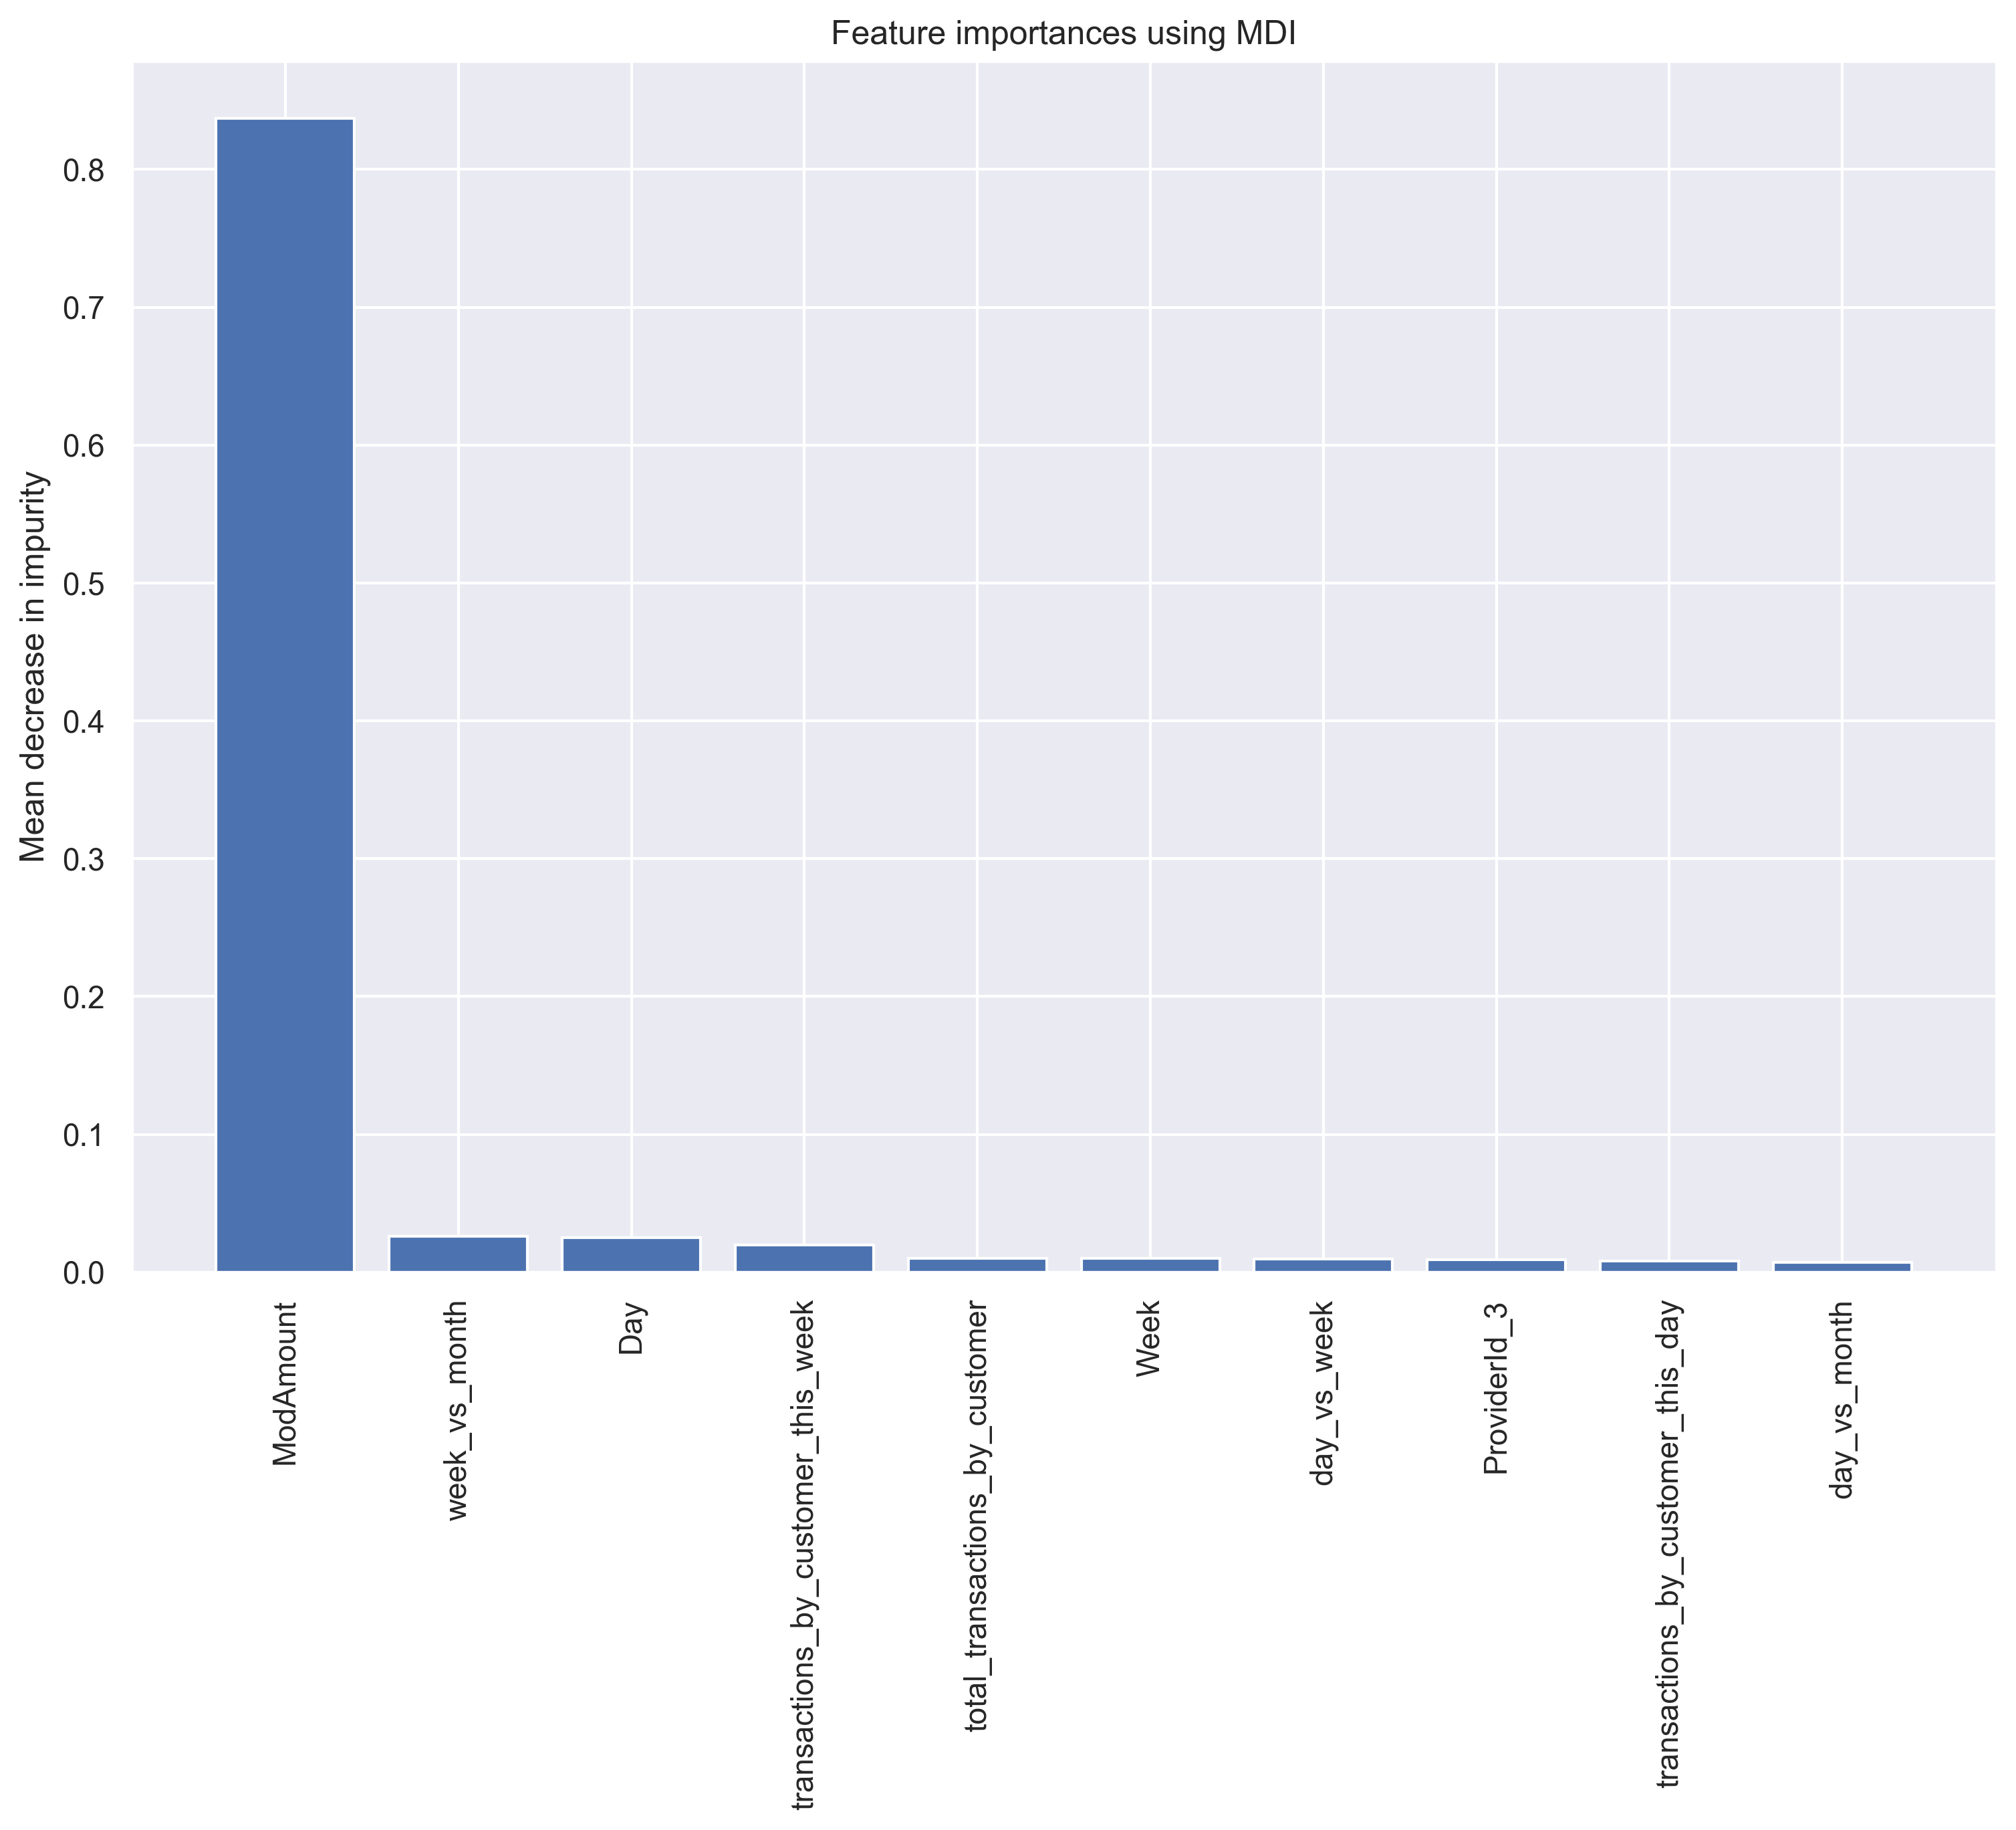

In [42]:
x_names=forest_importances.nlargest(10).index.to_list()
fig, ax = plt.subplots()
plt.bar([i for i in range(len(forest_importances.nlargest(10)))], forest_importances.nlargest(10))
plt.title("Feature importances using MDI")
plt.ylabel("Mean decrease in impurity")
plt.xticks(rotation = 90)
ax.set_xticks(ticks= [0,1,2,3,4,5,6,7,8,9], labels=x_names);

In [44]:
def get_classification_dfs(X_test_unscaled, y_test, y_pred):
    test_comb = X_test_unscaled.copy()
    test_comb["y_true"] = y_test
    test_comb["y_pred"] = y_pred
    false_positive = test_comb[test_comb.y_true < test_comb.y_pred]
    false_negative = test_comb[test_comb.y_true > test_comb.y_pred]
    correct = test_comb[test_comb.y_true == test_comb.y_pred]
    true_positive = correct[correct.y_pred == 1]
    true_negative = correct[correct.y_pred == 0]
    return true_negative, false_positive, false_negative, true_positive
    
def calculate_cost(X_test_unscaled, y_test, y_pred):
    '''Calculates the money saved by the model, returns the combined dataframe and the money saved by the model'''
    test_comb = X_test_unscaled.copy()
    test_comb["y_true"] = y_test
    test_comb["y_pred"] = y_pred
    false_positive = test_comb[test_comb.y_true < test_comb.y_pred]
    false_negative = test_comb[test_comb.y_true > test_comb.y_pred]
    correct = test_comb[test_comb.y_true == test_comb.y_pred]
    true_positive = correct[correct.y_pred == 1]
    true_negative = correct[correct.y_pred == 0]
    reimbursements = false_negative[false_negative.SignAmount == 1].ModAmount.sum()
    avoided_reimbursements = true_positive[true_positive.SignAmount == 1].ModAmount.sum()
    print(f"You detected {true_positive.shape[0]} fraudulent transactions")
    print(f"You saved the company {round((avoided_reimbursements)/1e6, 2)} Million UGX")
    print(f"You missed {false_negative.shape[0]} fraudulent transactions")
    print(f"The company now has to reimburse frauds with a total of {round((reimbursements)/1e6, 2)} Million UGX")
    print(f"Total money saved is {round((avoided_reimbursements - reimbursements)/1e6, 2)} Million UGX")
    print(f"You incorrectly flagged {false_positive.shape[0]} legit transactions as fraudulent")

In [45]:
TN, FP, FN, TP = get_classification_dfs(X_test_unscaled, y_test, y_pred)
og_df= pd.read_csv("data/training.csv")
og_df["TransactionId"]=og_df.TransactionId.str.split('_').str[-1]
og_df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [46]:
TN = og_df.loc[og_df["TransactionId"].isin(np.array(TN["TransactionId"]).astype(str))]
FP = og_df.loc[og_df["TransactionId"].isin(np.array(FP["TransactionId"]).astype(str))]
FN = og_df.loc[og_df["TransactionId"].isin(np.array(FN["TransactionId"]).astype(str))]
TP = og_df.loc[og_df["TransactionId"].isin(np.array(TP["TransactionId"]).astype(str))]

[Text(0.5, 1.0, 'TP'), (0.0, 30.0)]

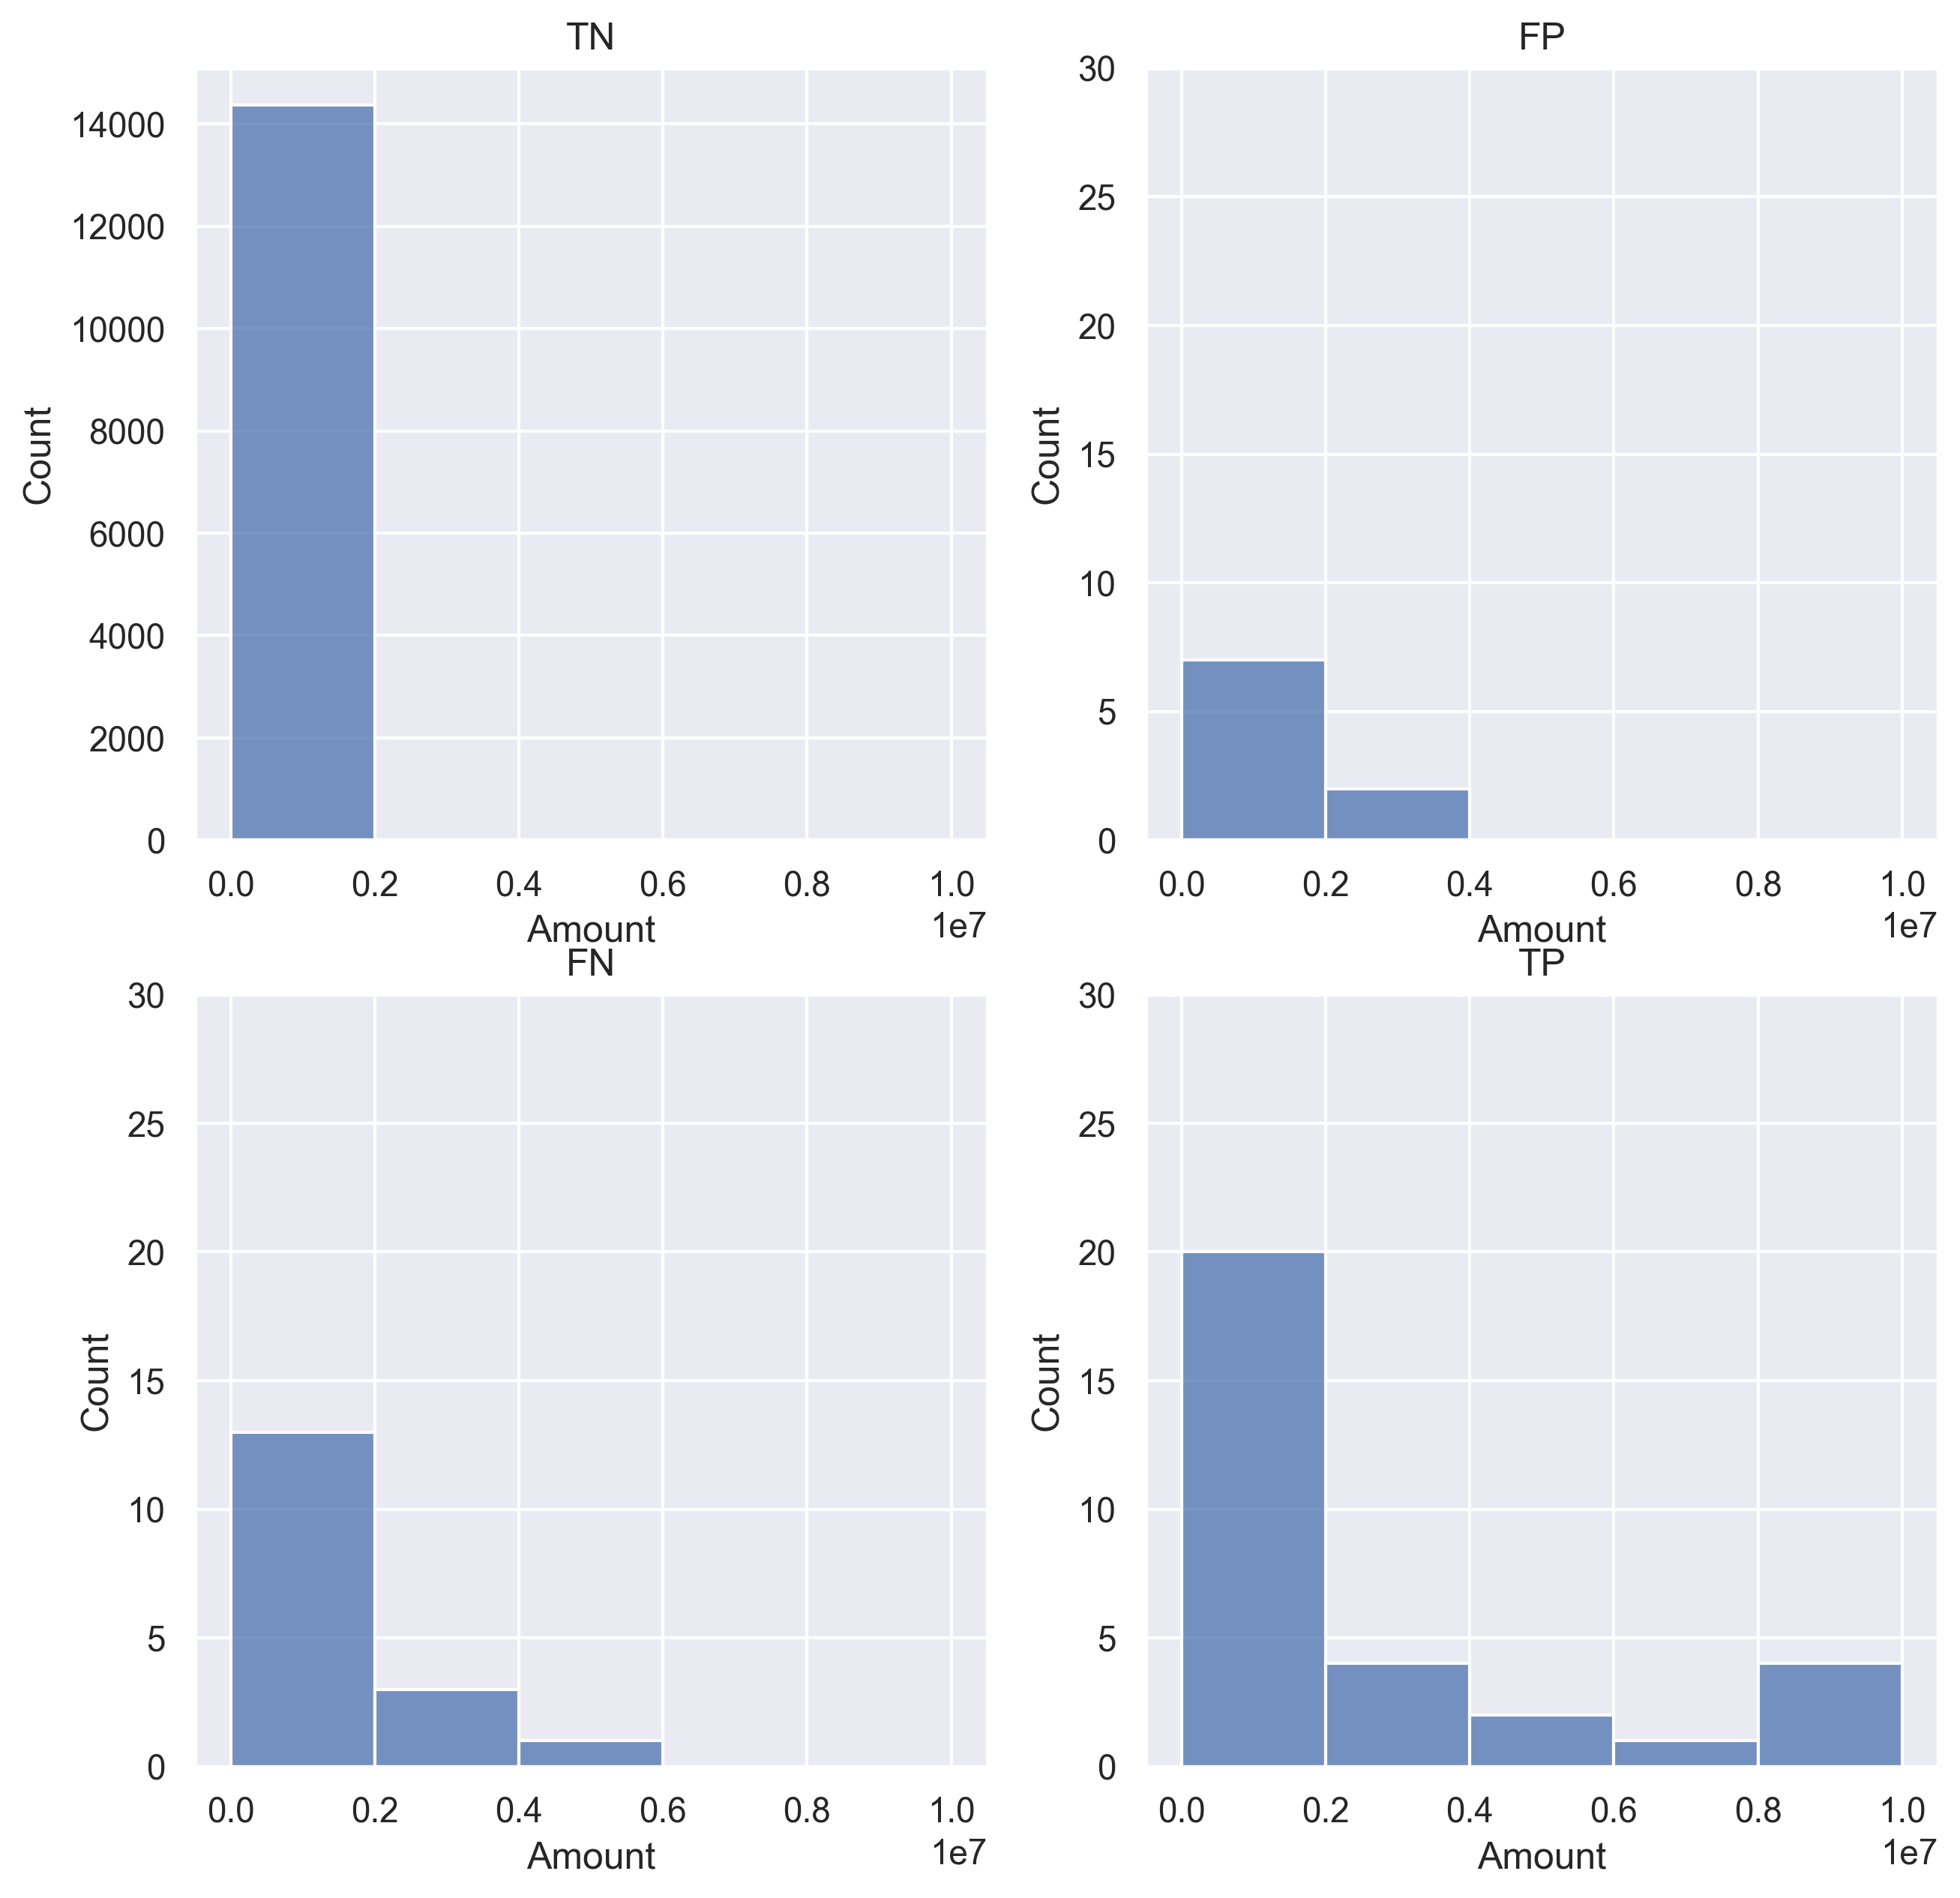

In [47]:
fig, axes = plt.subplots(2, 2, sharey=False, figsize=(10,10))
sns.histplot(ax=axes[0,0], data= TN, x="Amount", binrange=(0,1e7), bins=5).set(title = "TN")
sns.histplot(ax=axes[0,1], data= FP, x="Amount", binrange=(0,1e7), bins=5).set(title = "FP", ylim=(0, 30))
sns.histplot(ax=axes[1,0], data= FN, x="Amount", binrange=(0,1e7), bins=5).set(title = "FN", ylim=(0, 30))
sns.histplot(ax=axes[1,1], data= TP, x="Amount", binrange=(0,1e7), bins=5).set(title = "TP", ylim=(0, 30))

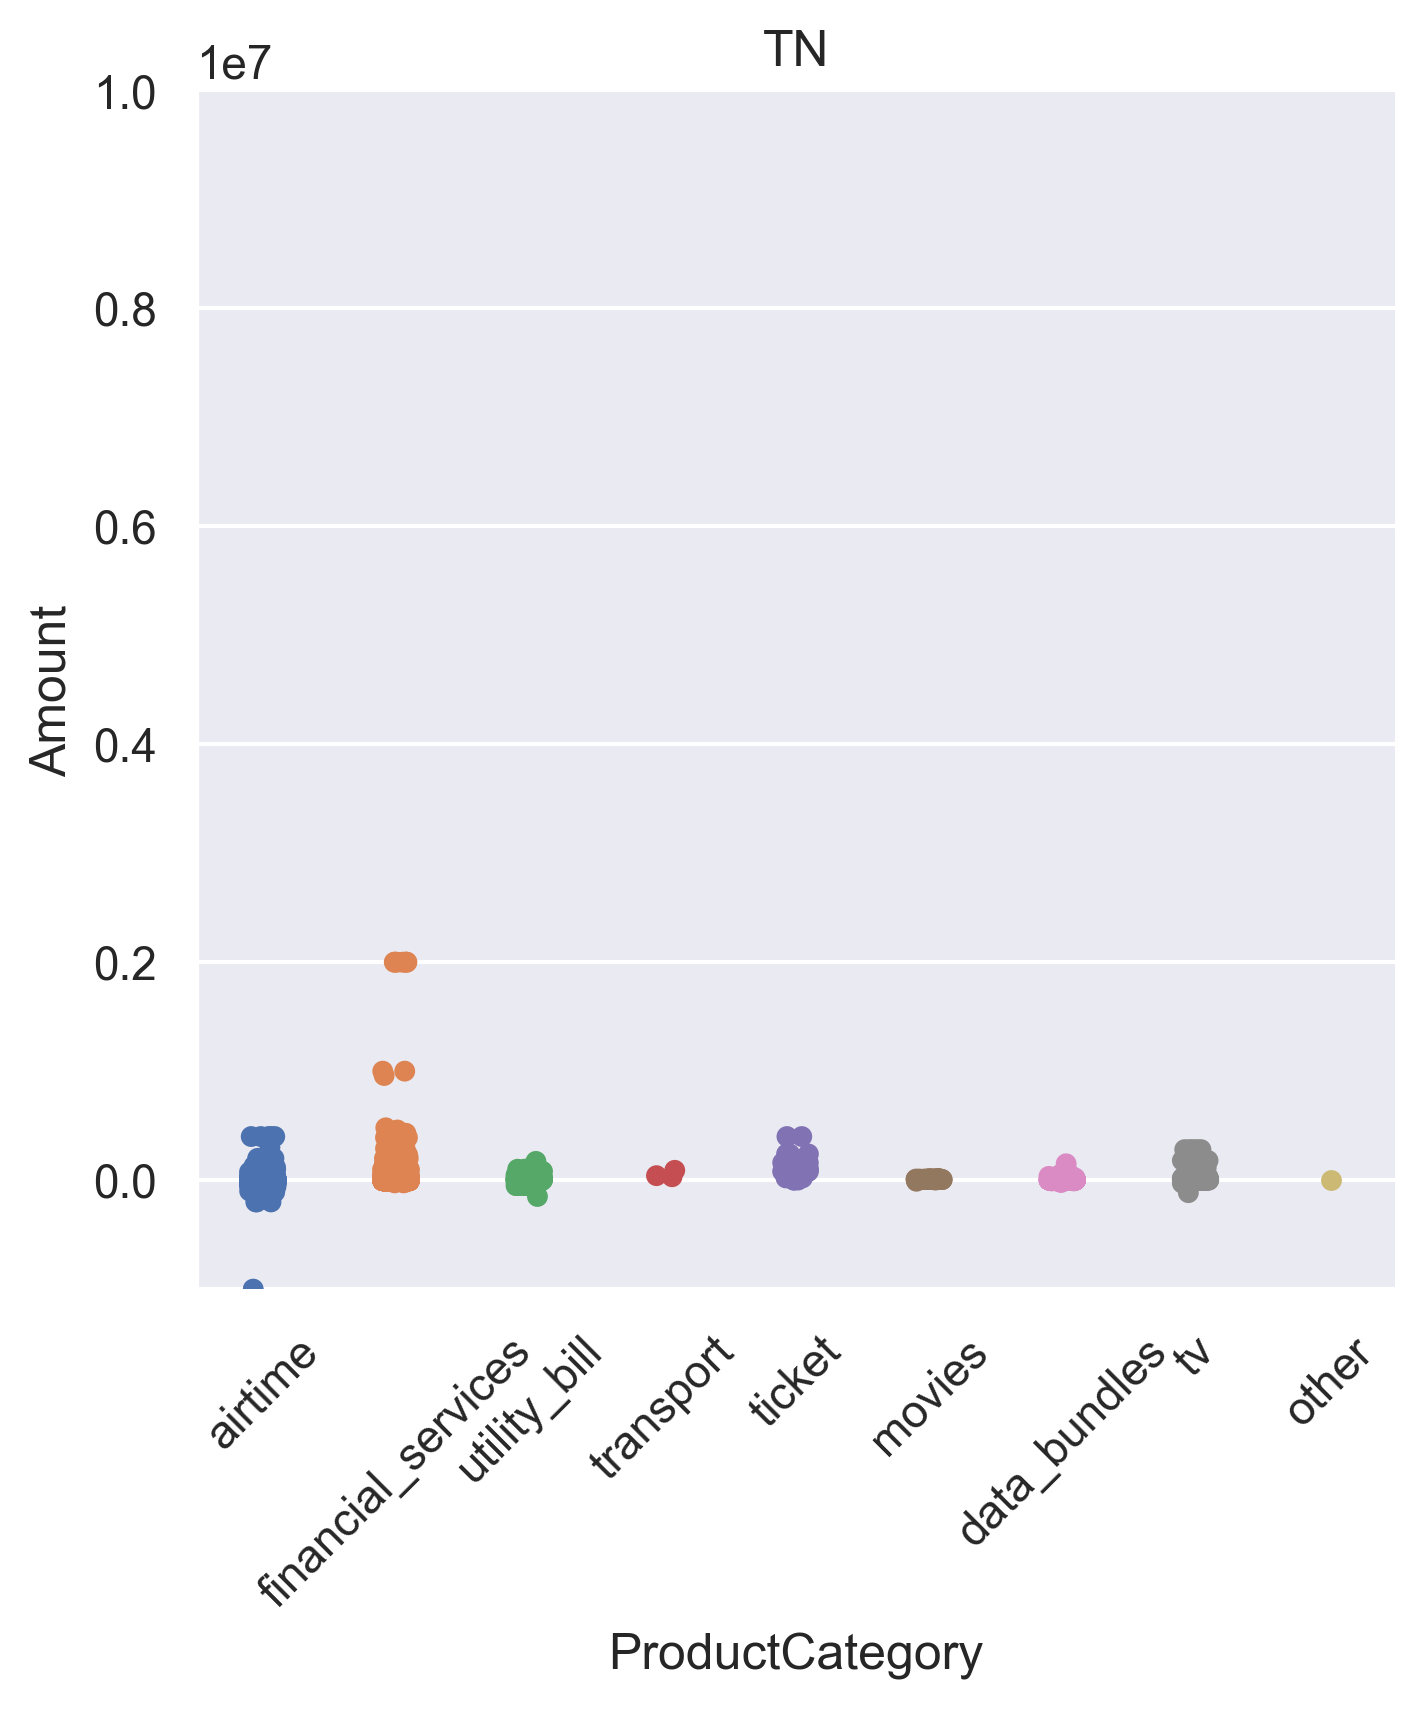

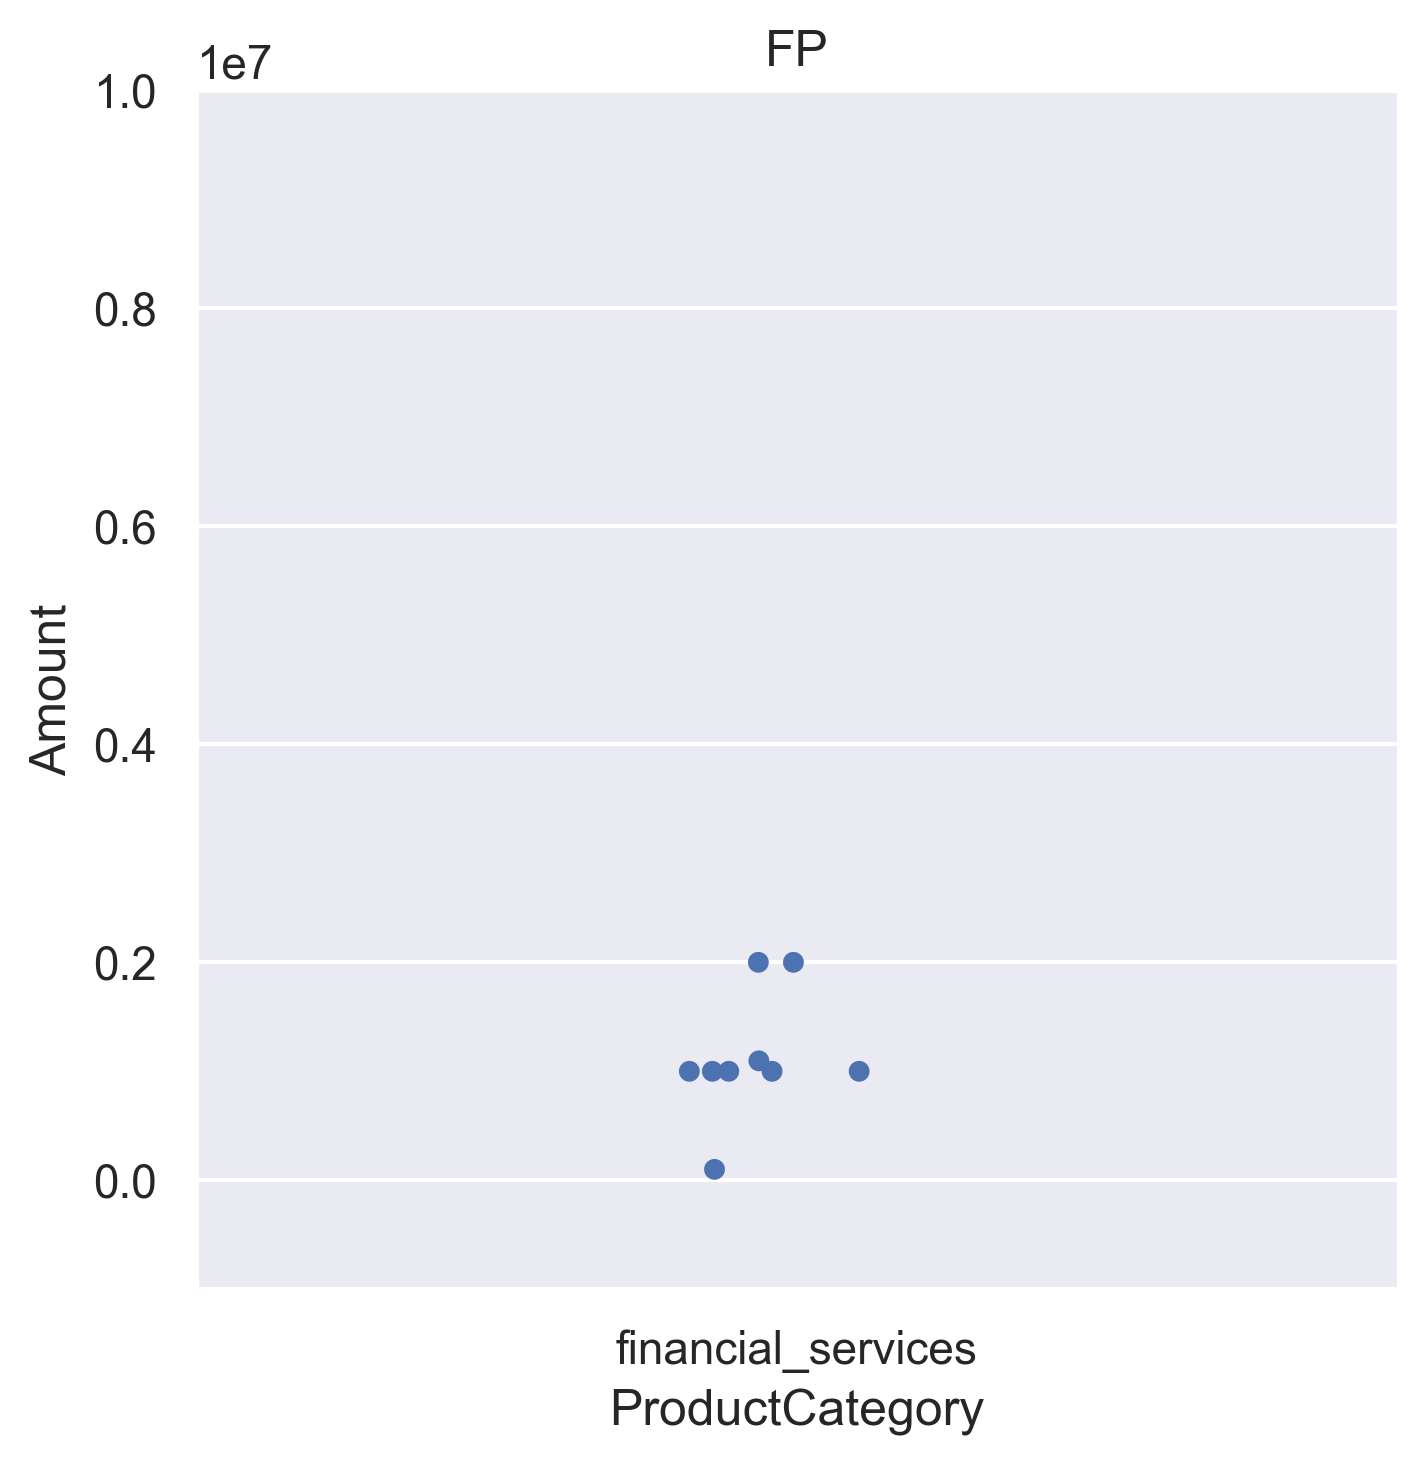

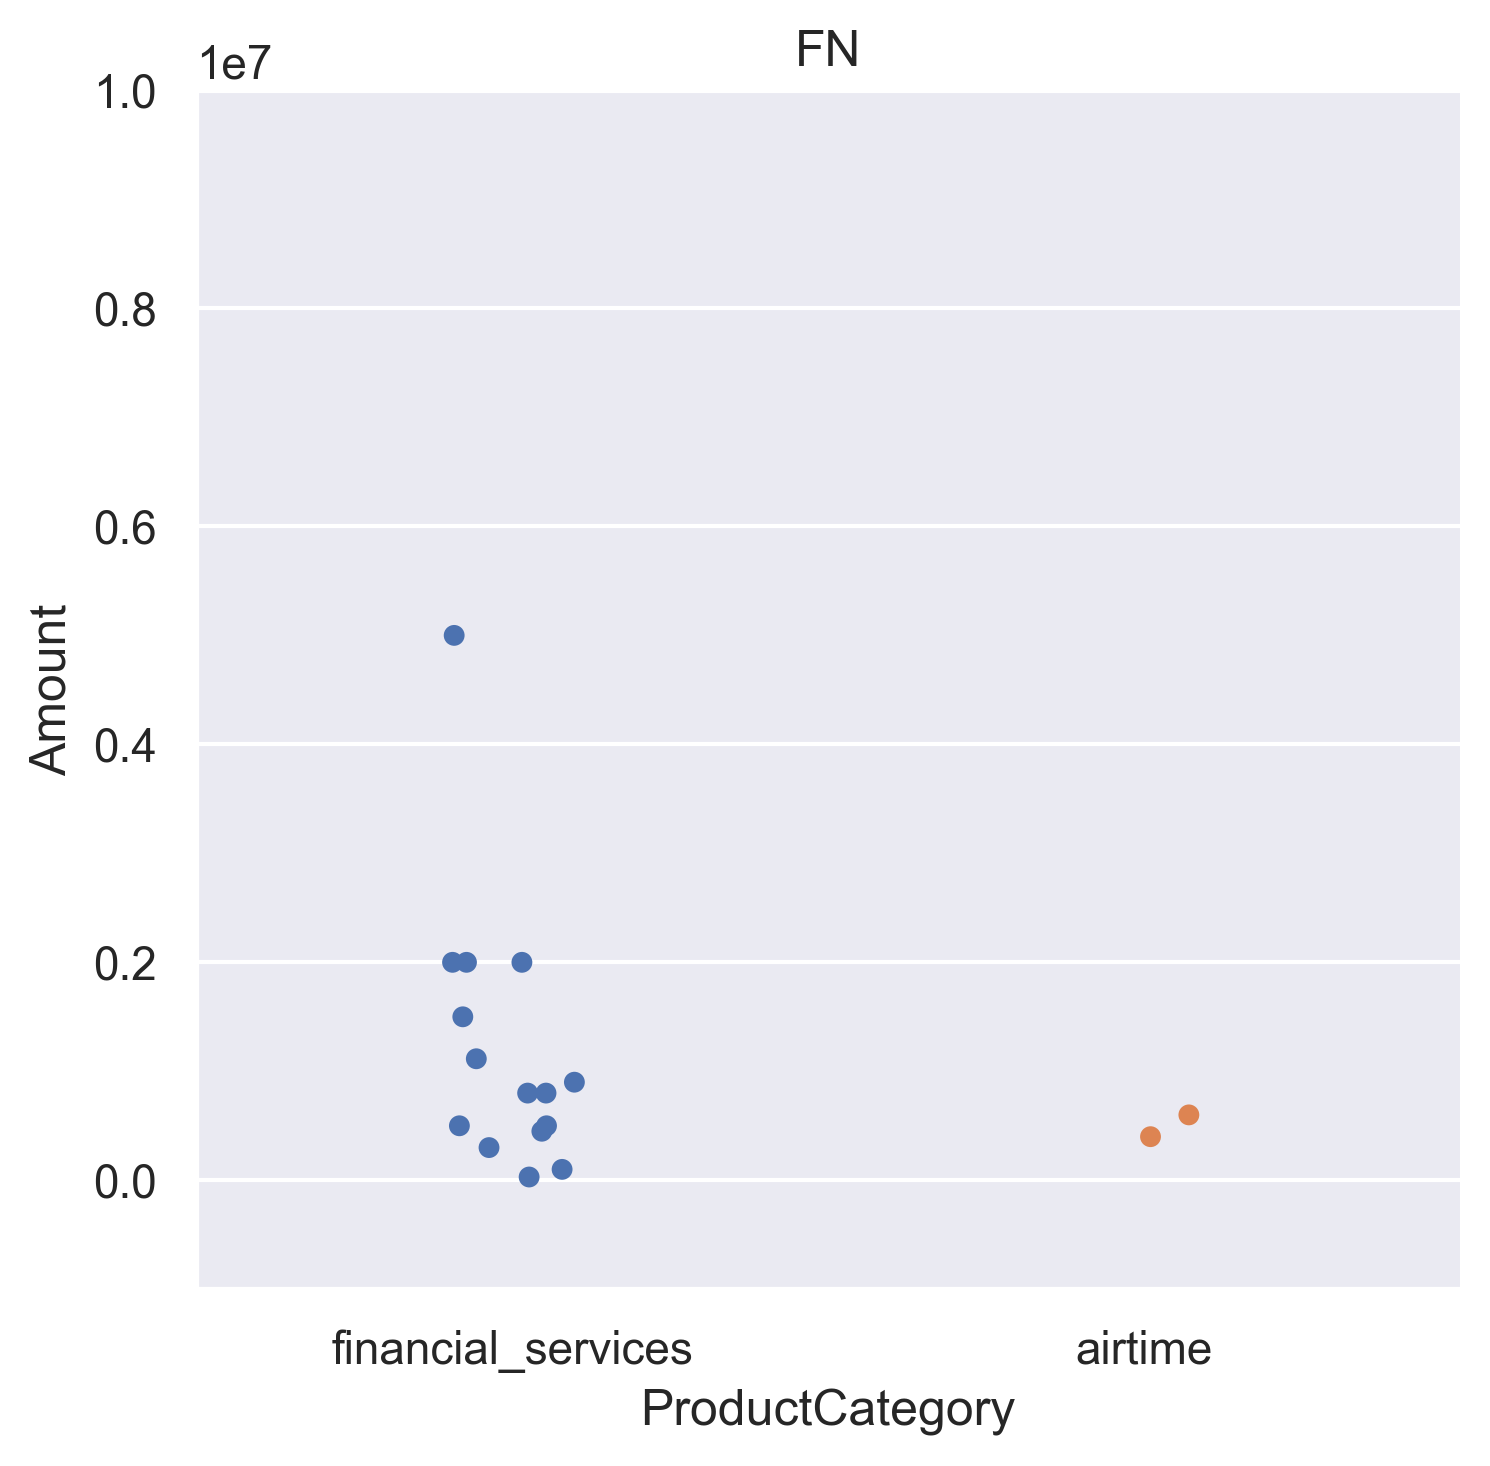

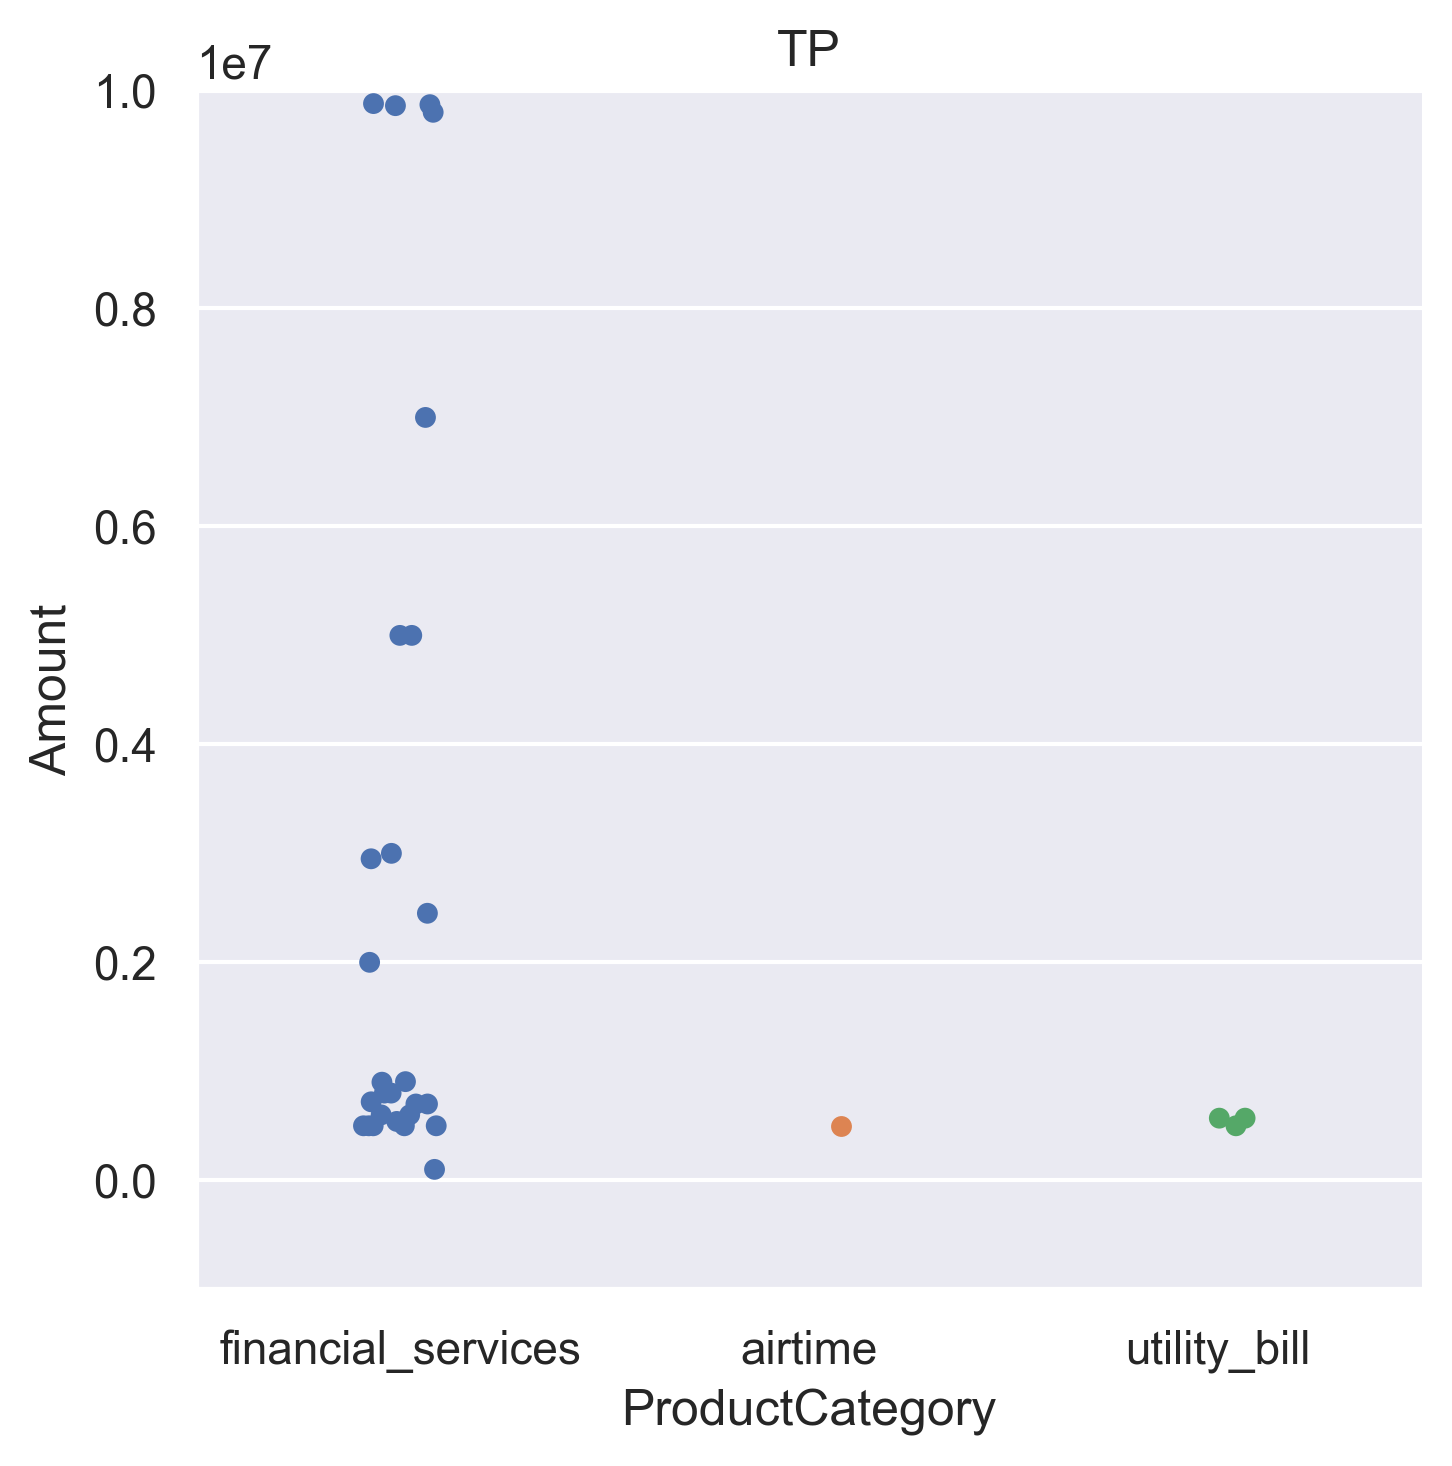

In [53]:
sns.catplot(data= TN, x="ProductCategory",  y="Amount").set(title = "TN", ylim=(-1e6, 1e7))
plt.xticks(rotation = 45)
sns.catplot(data= FP, x="ProductCategory", y="Amount").set(title = "FP", ylim=(-1e6, 1e7))
sns.catplot(data= FN, x="ProductCategory", y="Amount").set(title = "FN", ylim=(-1e6, 1e7))
sns.catplot(data= TP, x="ProductCategory", y="Amount").set(title = "TP", ylim=(-1e6, 1e7))

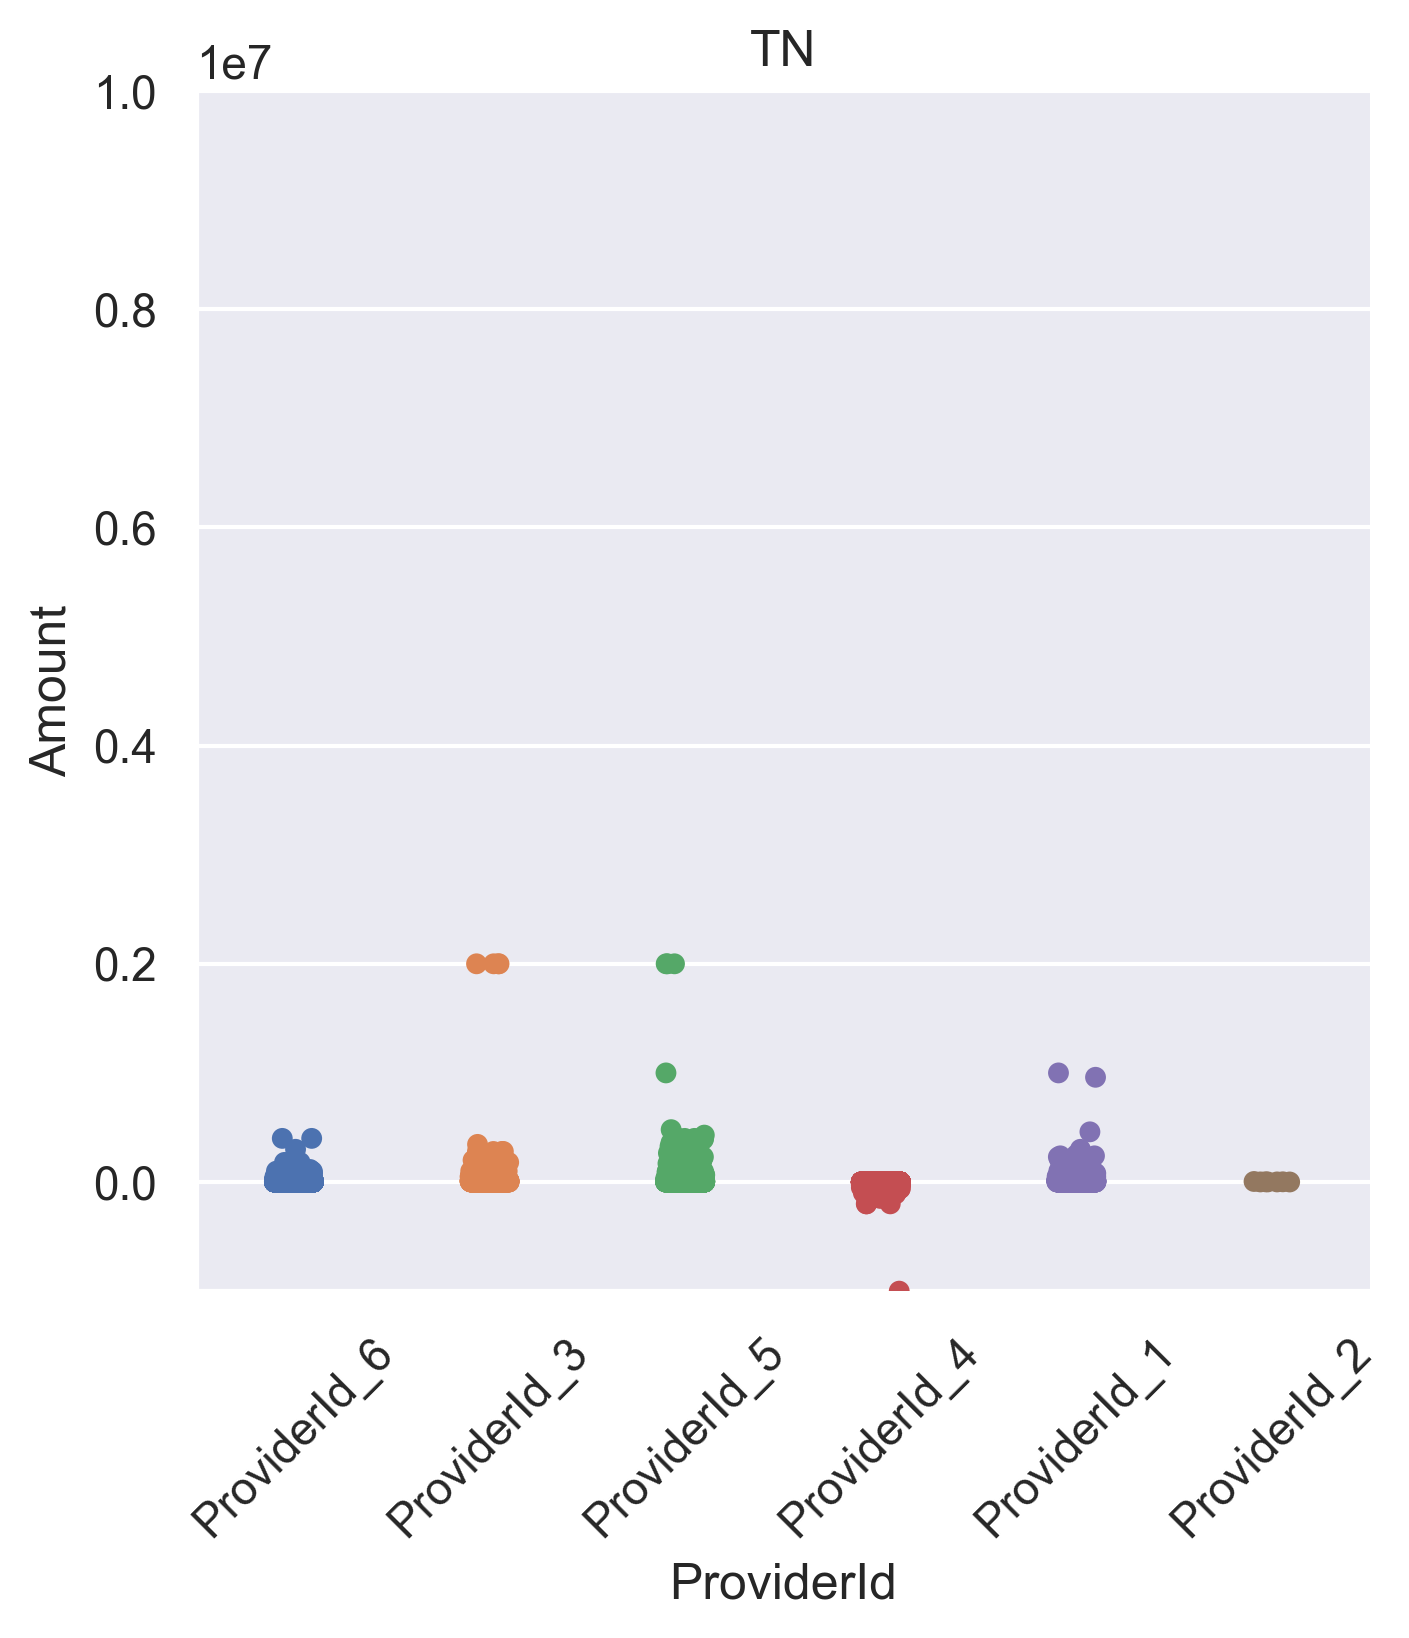

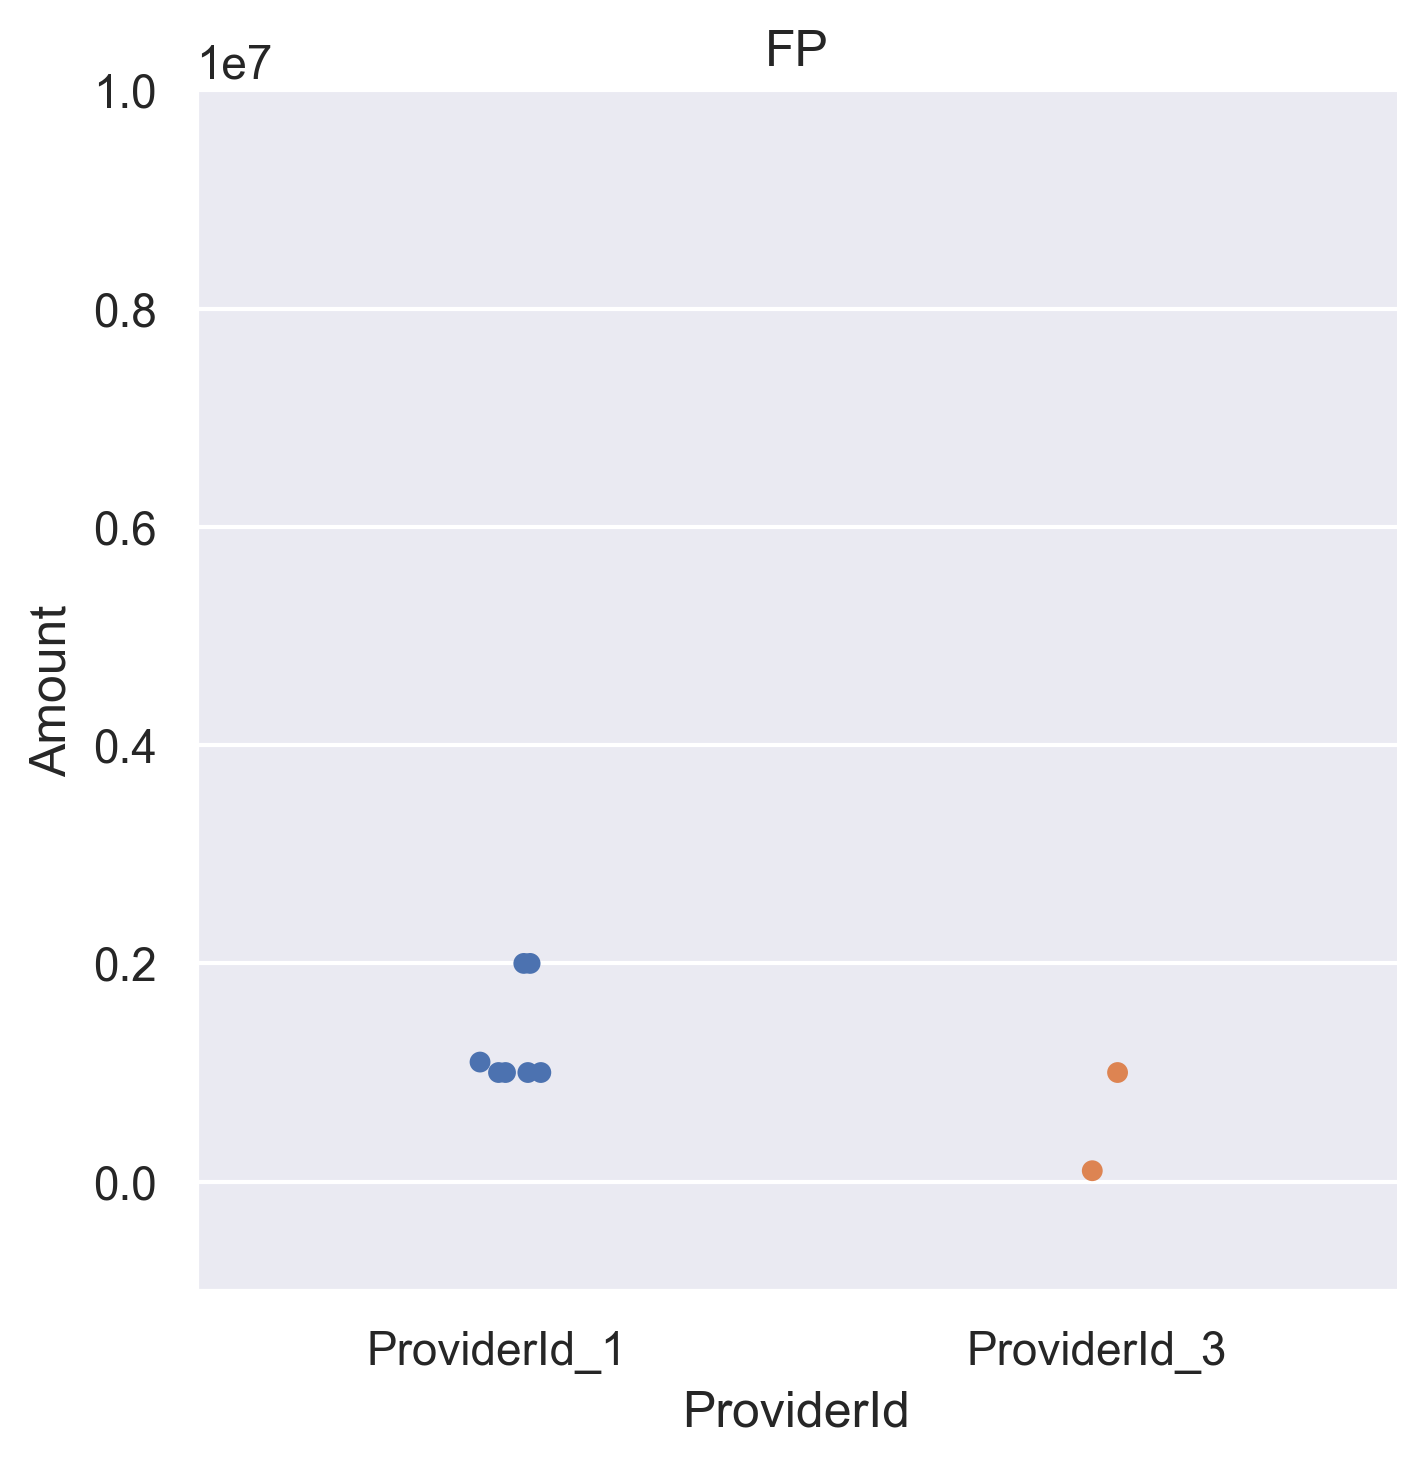

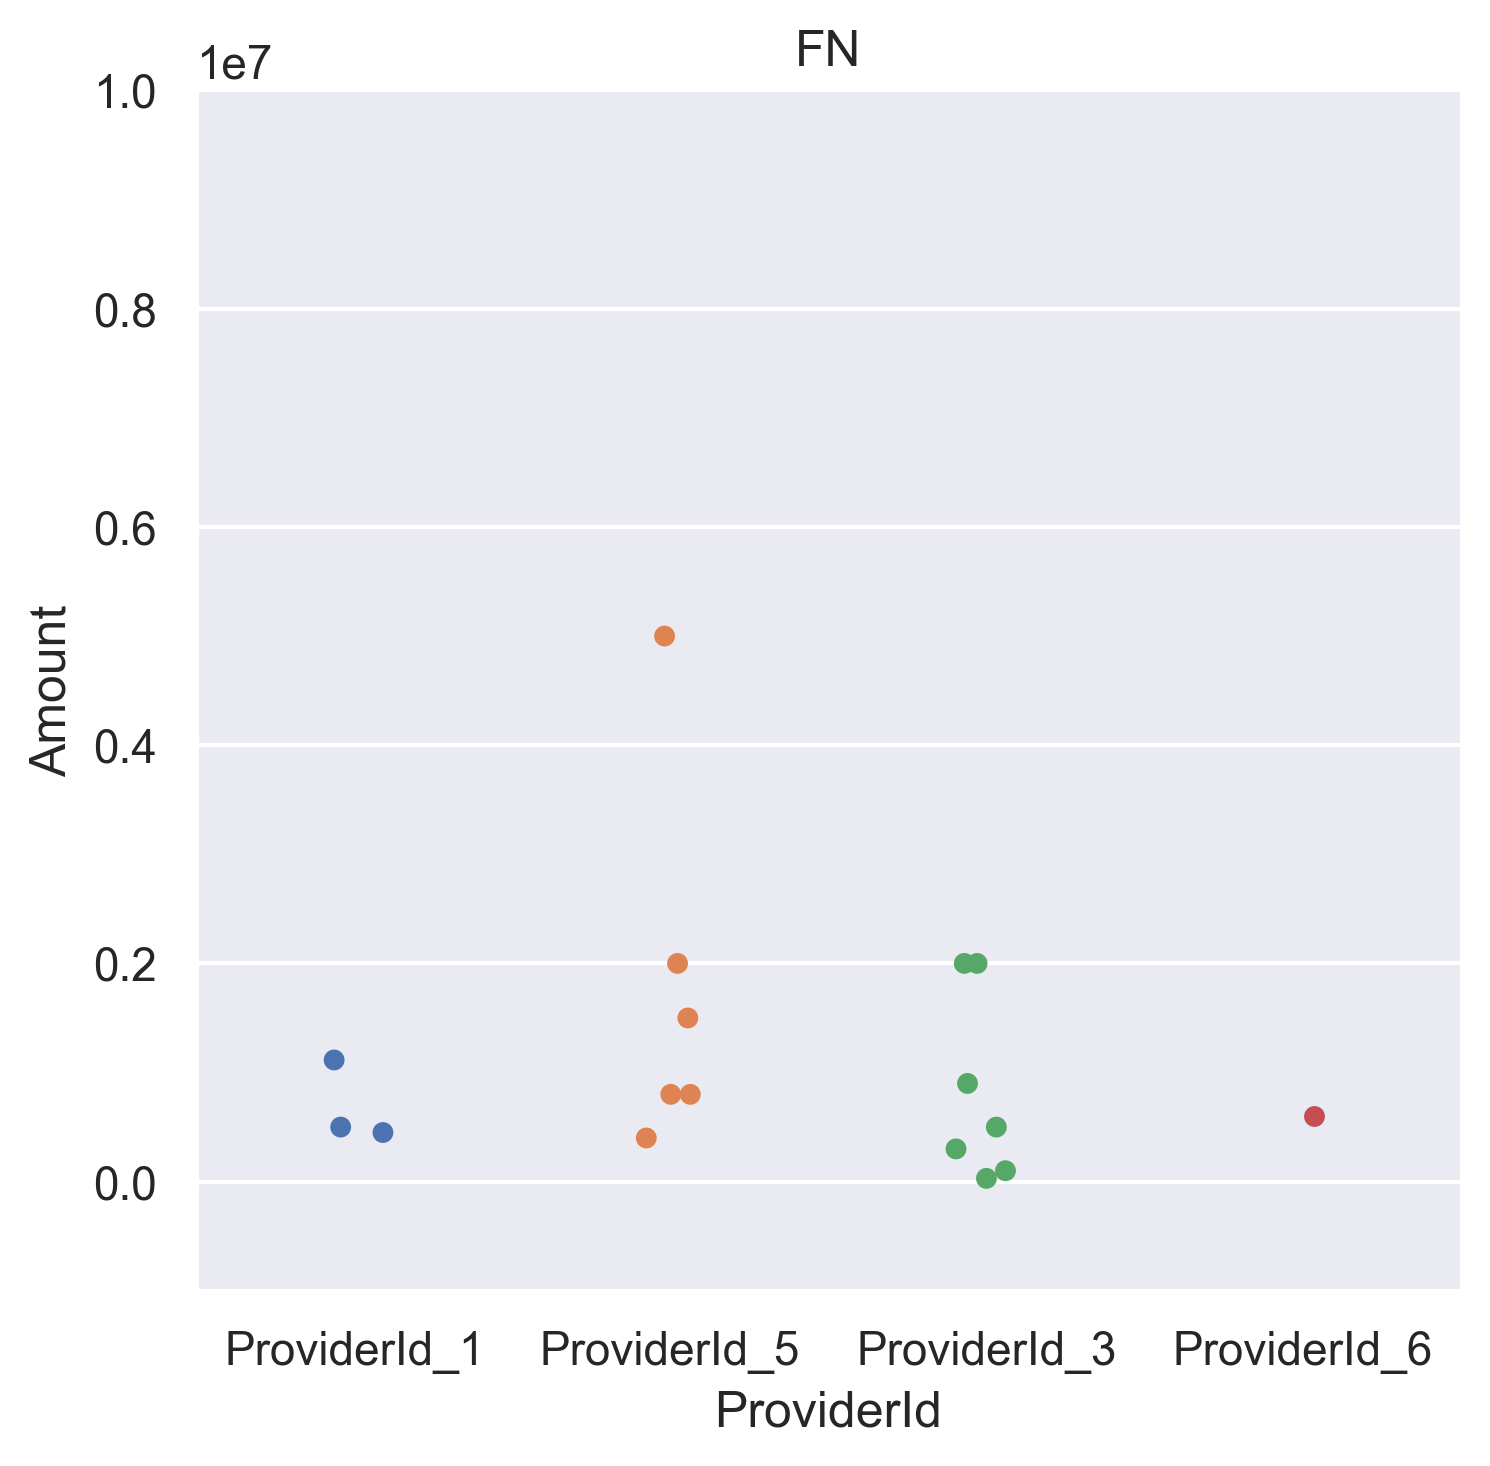

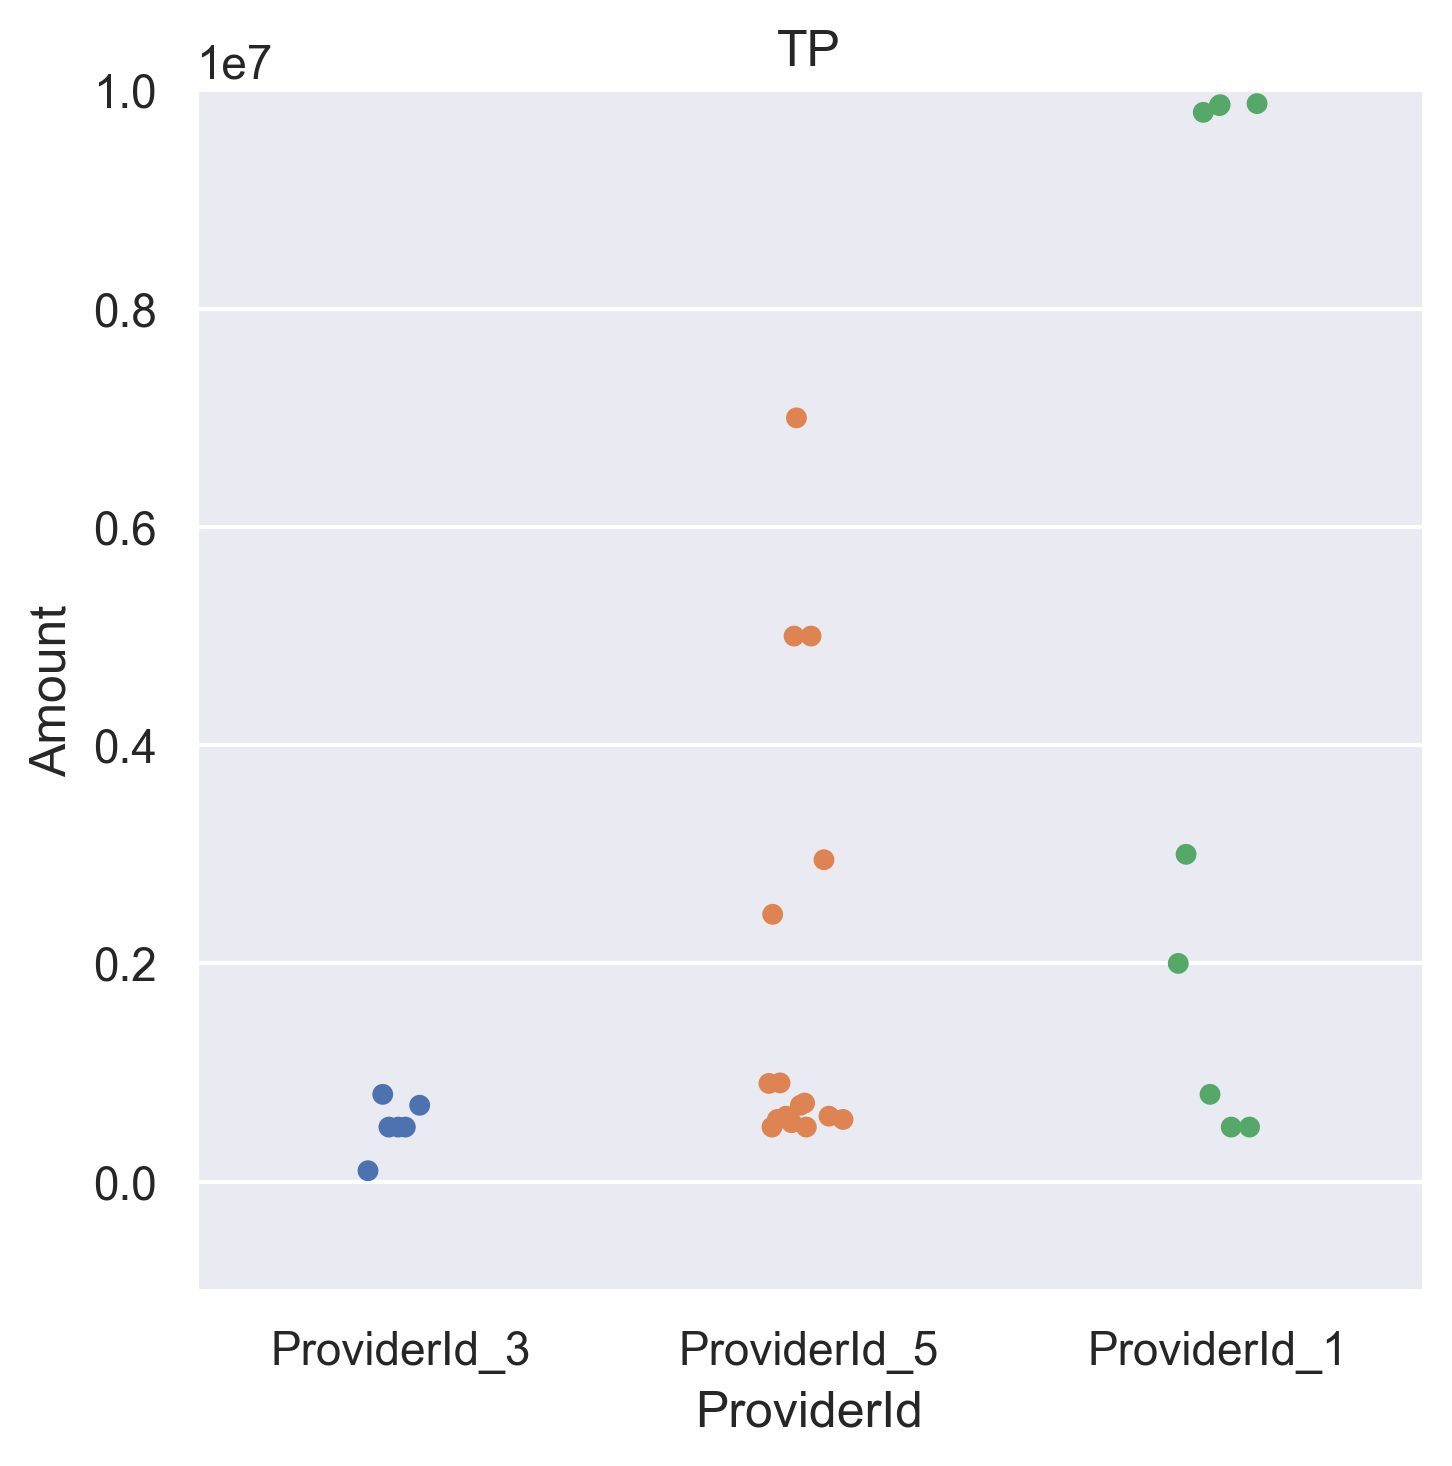

In [52]:
sns.catplot(data= TN, x="ProviderId",  y="Amount").set(title = "TN", ylim=(-1e6, 1e7))
plt.xticks(rotation = 45)
sns.catplot(data= FP, x="ProviderId", y="Amount").set(title = "FP", ylim=(-1e6, 1e7))
sns.catplot(data= FN, x="ProviderId", y="Amount").set(title = "FN", ylim=(-1e6, 1e7))
sns.catplot(data= TP, x="ProviderId", y="Amount").set(title = "TP", ylim=(-1e6, 1e7))


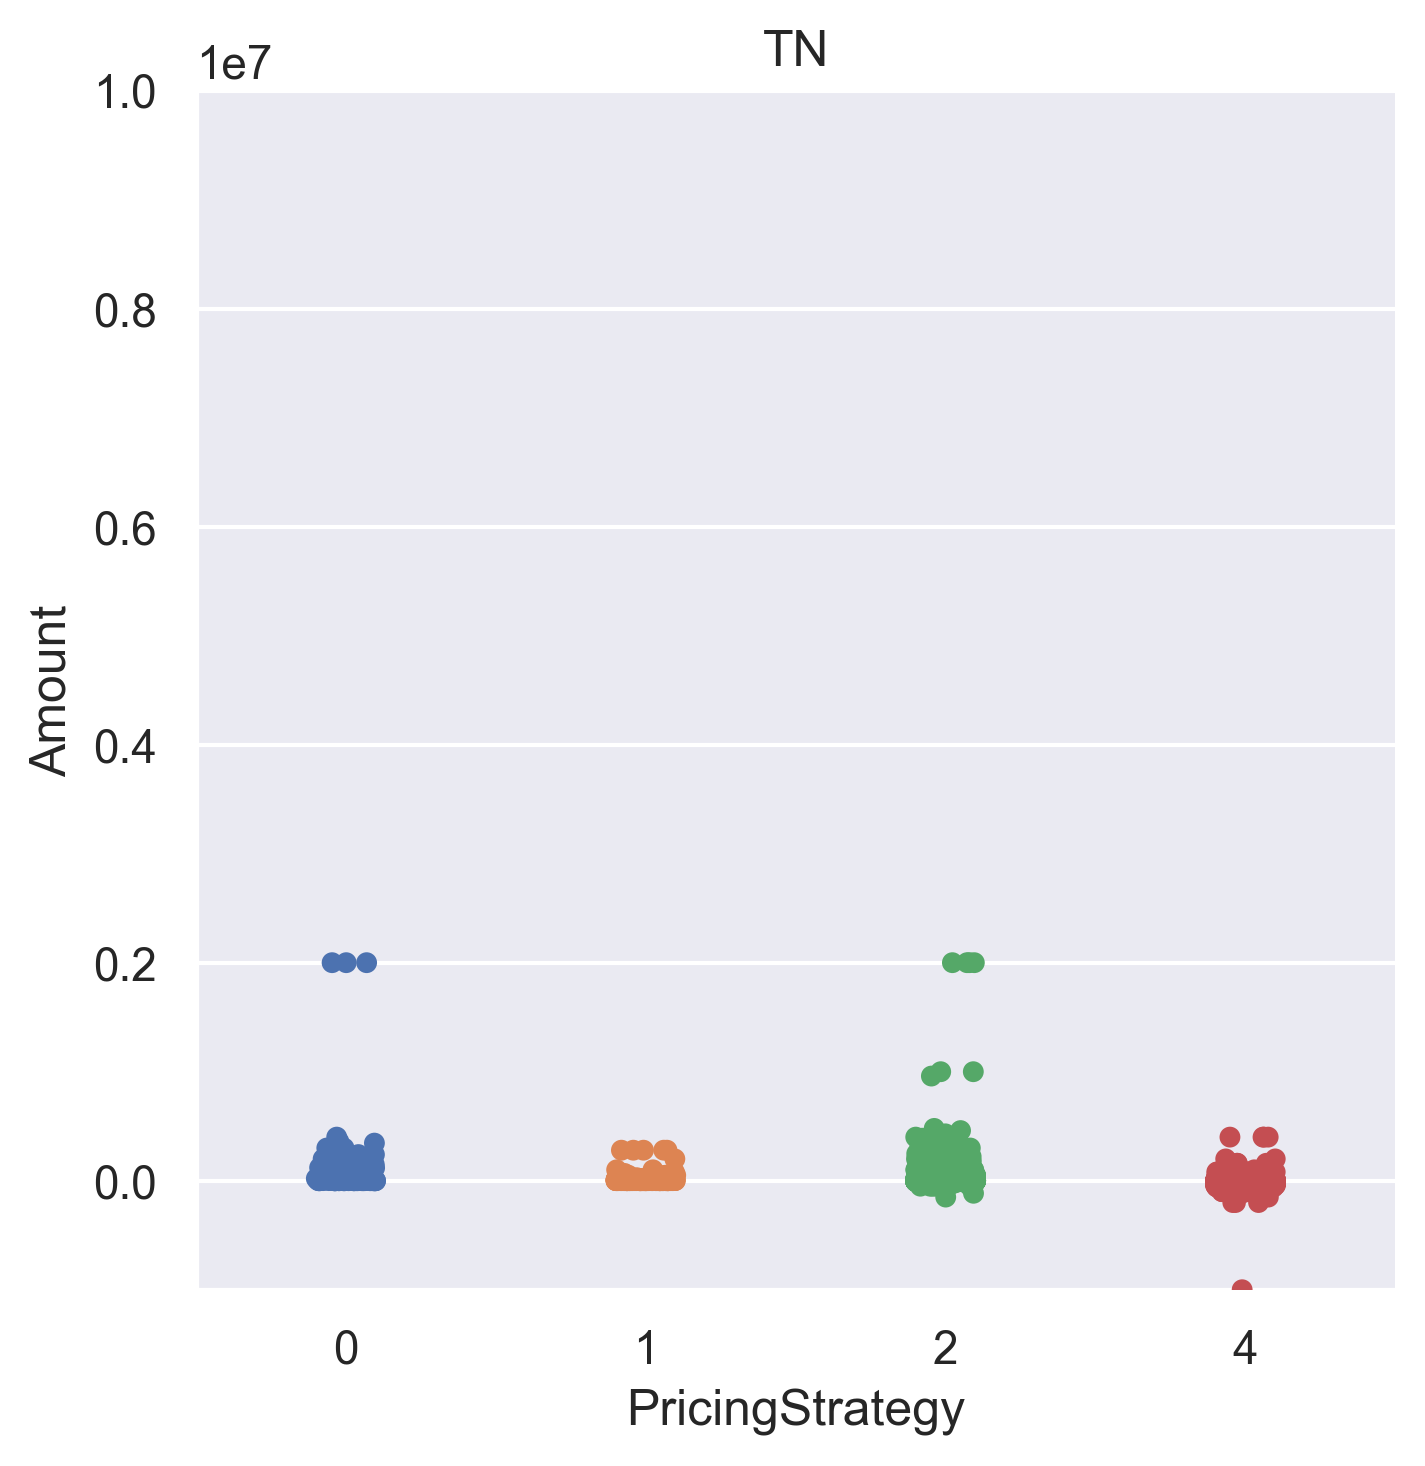

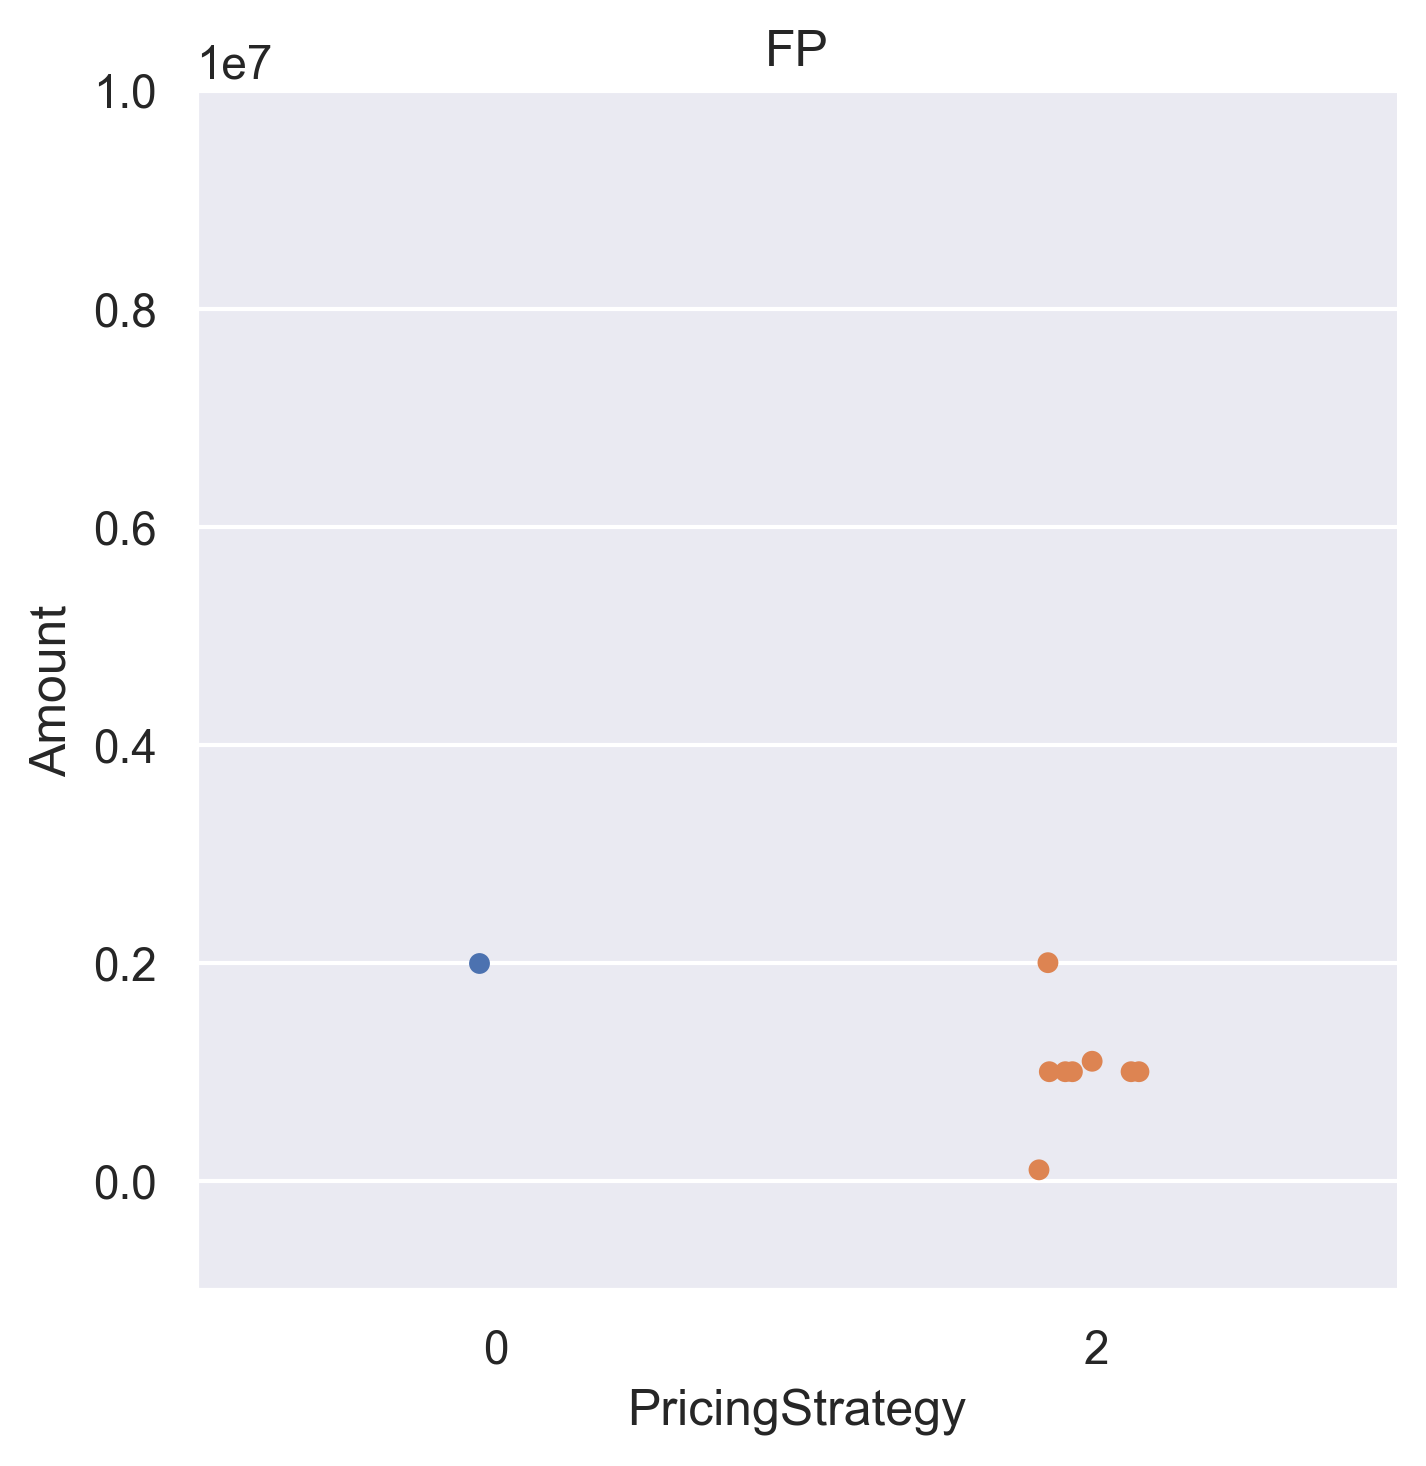

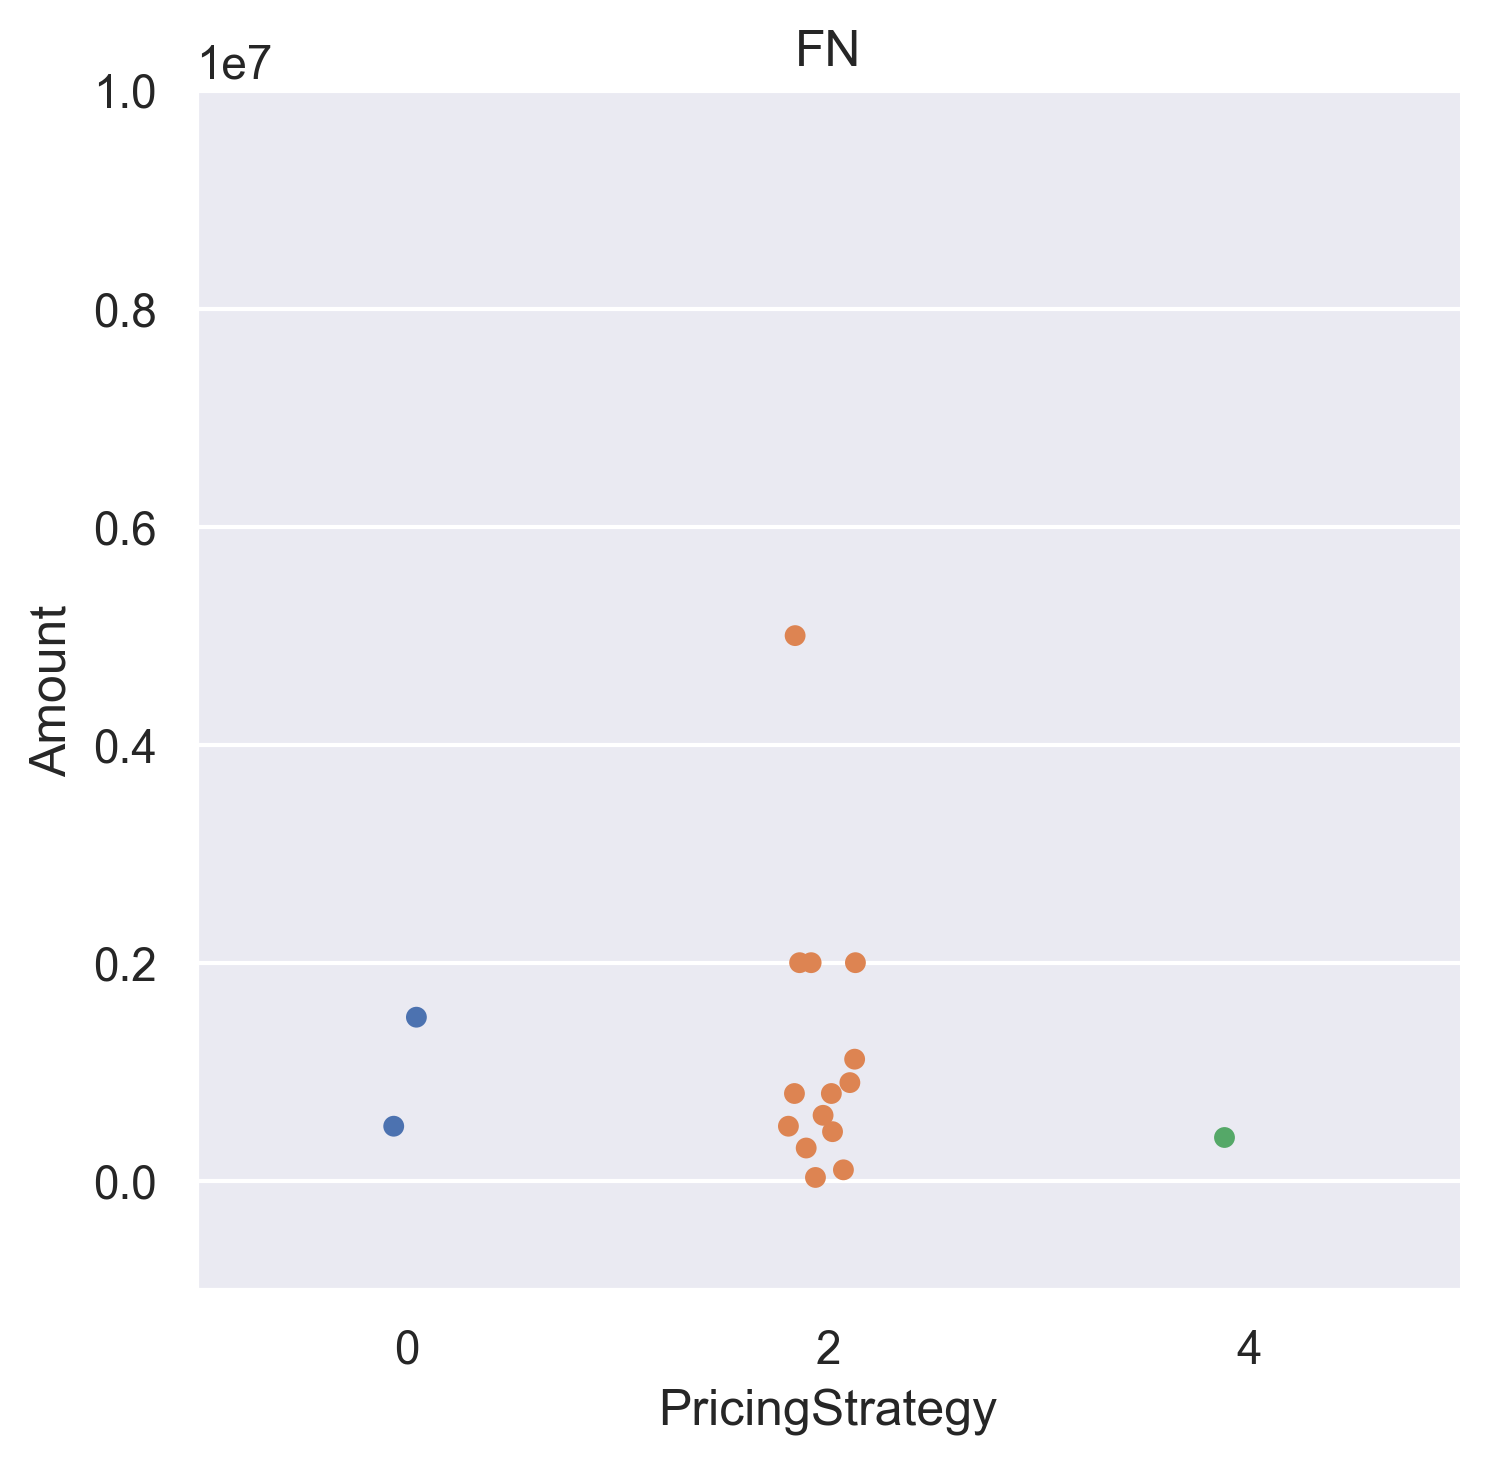

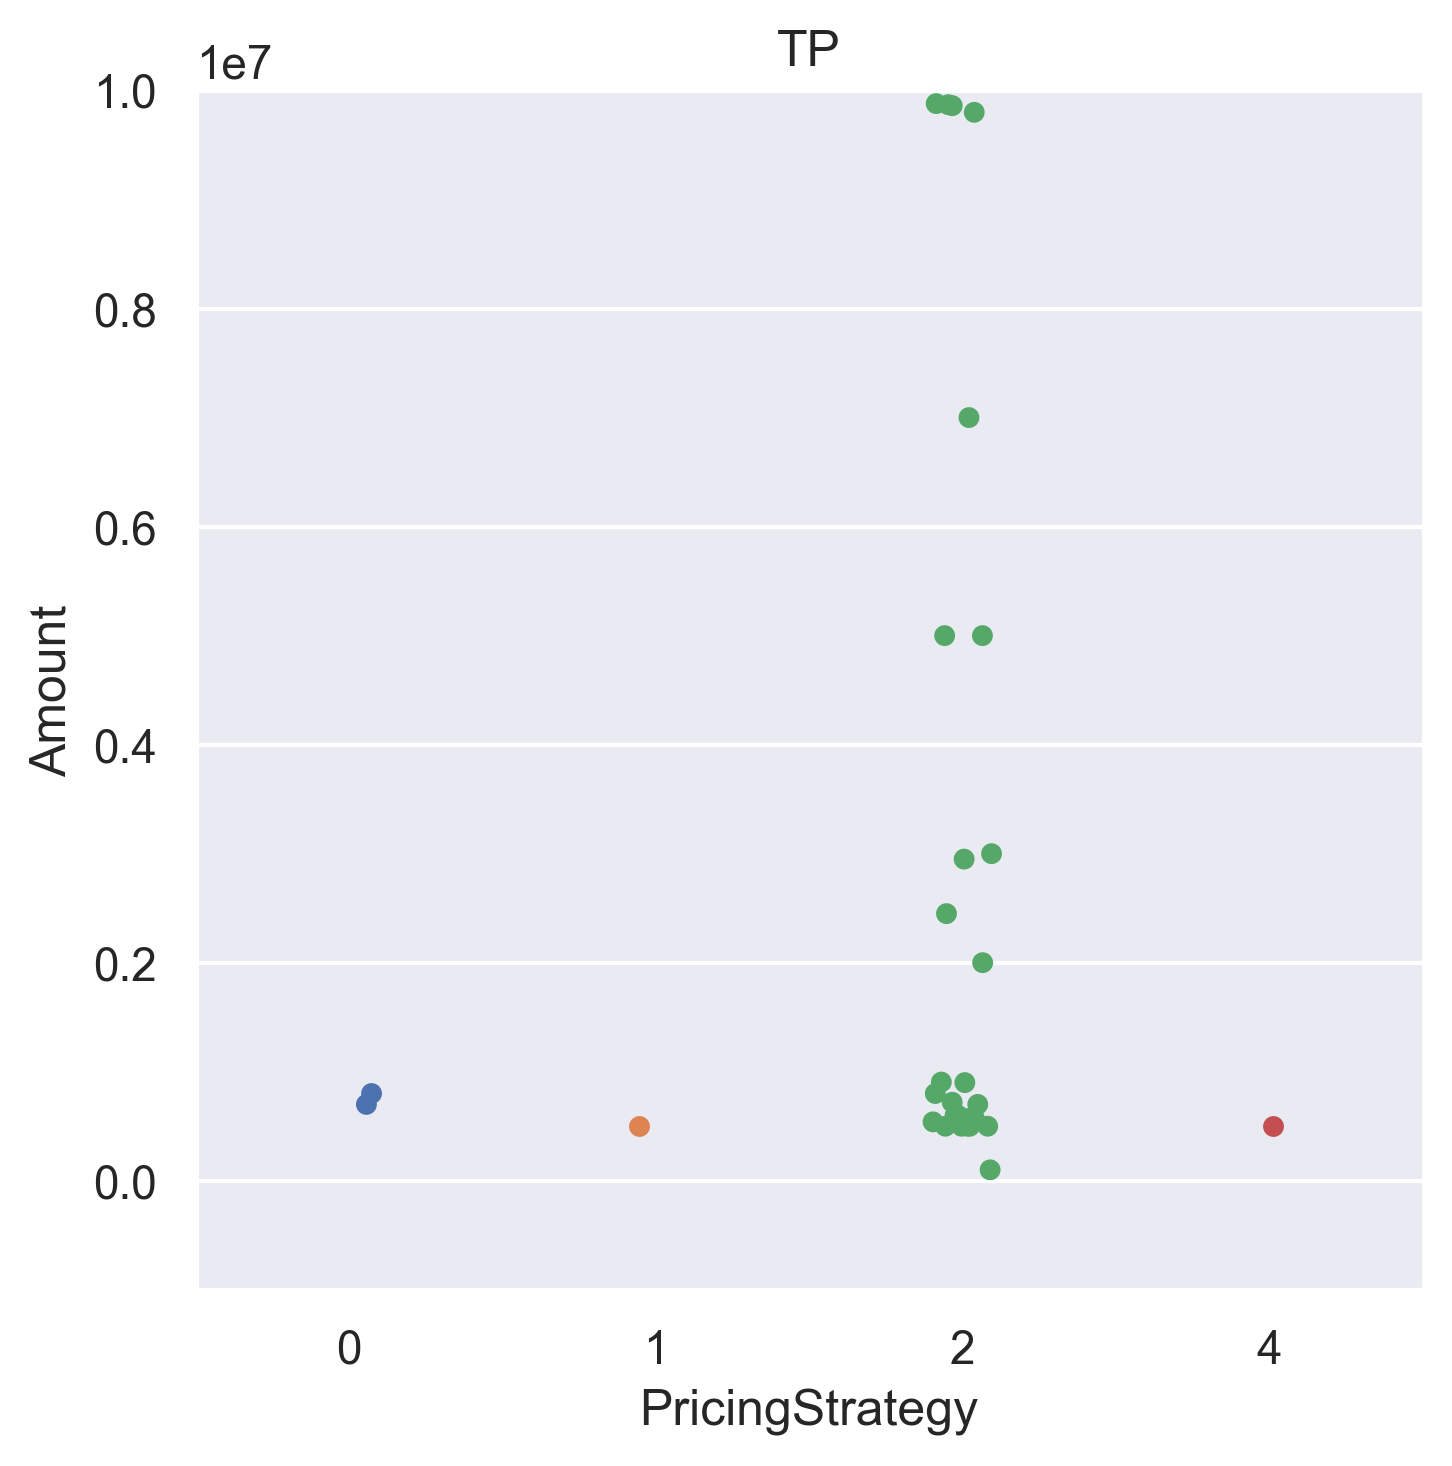

In [50]:
sns.catplot(data= TN, x="PricingStrategy",  y="Amount").set(title = "TN", ylim=(-1e6, 1e7))
sns.catplot(data= FP, x="PricingStrategy", y="Amount").set(title = "FP", ylim=(-1e6, 1e7))
sns.catplot(data= FN, x="PricingStrategy", y="Amount").set(title = "FN", ylim=(-1e6, 1e7))
sns.catplot(data= TP, x="PricingStrategy", y="Amount").set(title = "TP", ylim=(-1e6, 1e7))